### Problem 1:
You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns

In [41]:
df = pd.read_csv("Election_Data.csv")

In [42]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [44]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.shape

(1525, 10)

In [46]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [47]:
df=df.drop('Unnamed: 0',axis=1)

In [48]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [49]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [50]:
df.drop_duplicates()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [51]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [53]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


### Skewness

In [55]:
import scipy.stats as stats
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.age),stats.skew(df.Blair),stats.skew(df.Hague),stats.skew(df.Europe)]},
                        index=['age','Blair','Hague','Europe'])  # Measure the skeweness of the required columns
Skewness


,Skewness
age,0.144478
Blair,-0.534892
Hague,0.151950
Europe,-0.135813


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

### Univariate Analysis

vote
Skew : -0.86


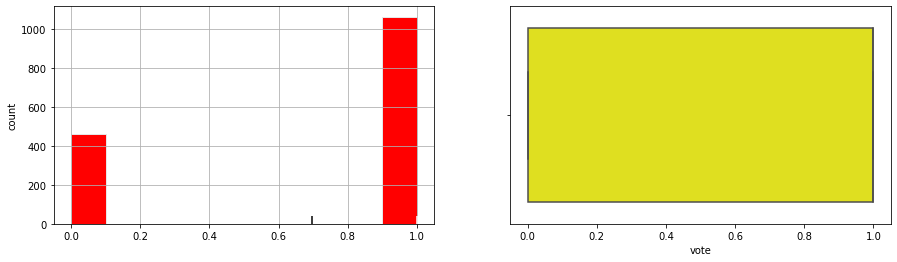

age
Skew : 0.14


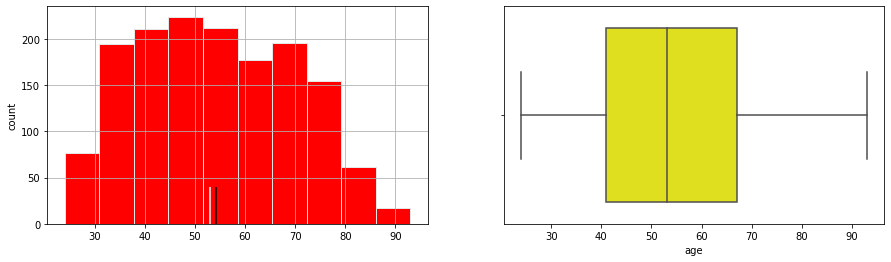

economic.cond.national
Skew : -0.24


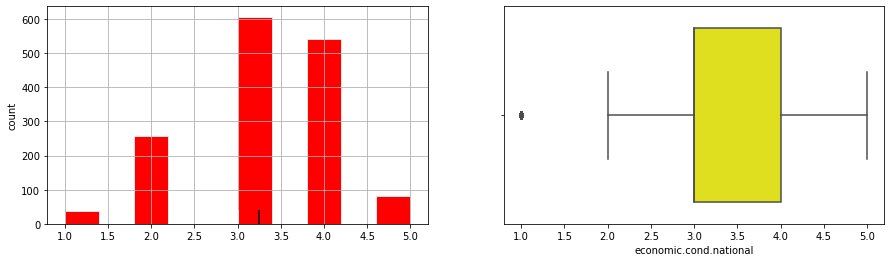

economic.cond.household
Skew : -0.15


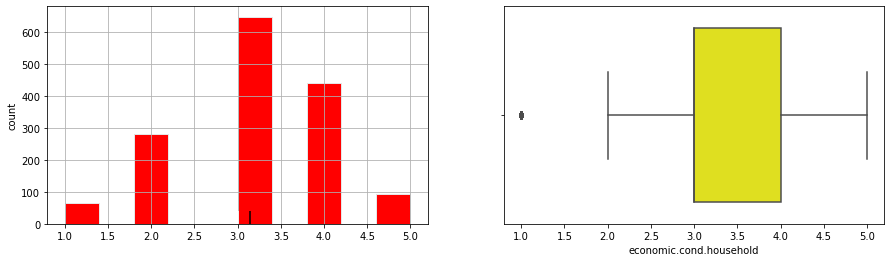

Blair
Skew : -0.54


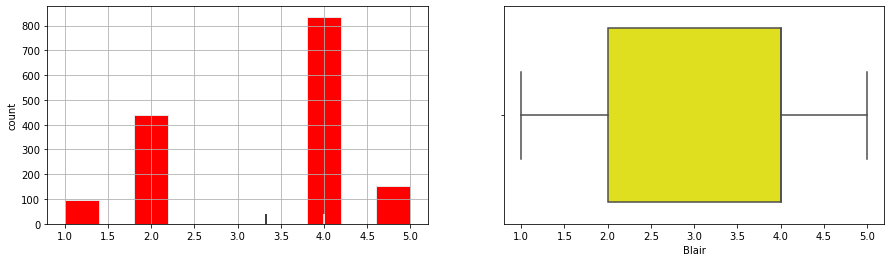

Hague
Skew : 0.15


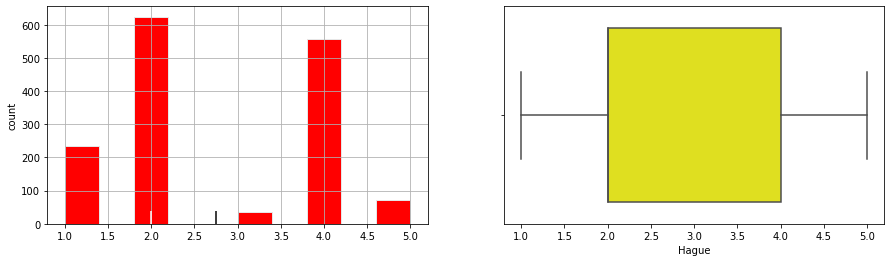

Europe
Skew : -0.14


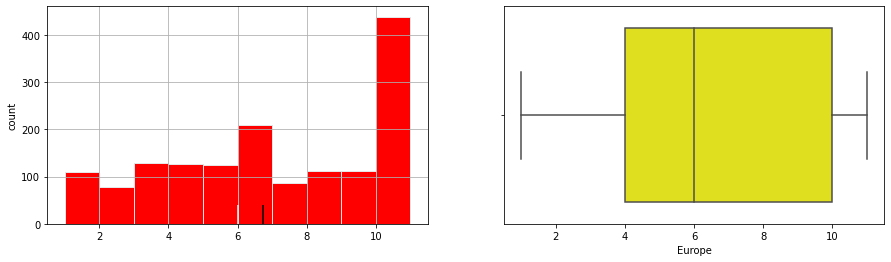

political.knowledge
Skew : -0.43


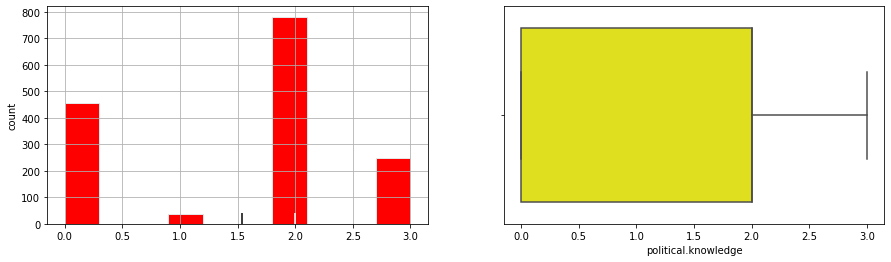

gender
Skew : 0.13


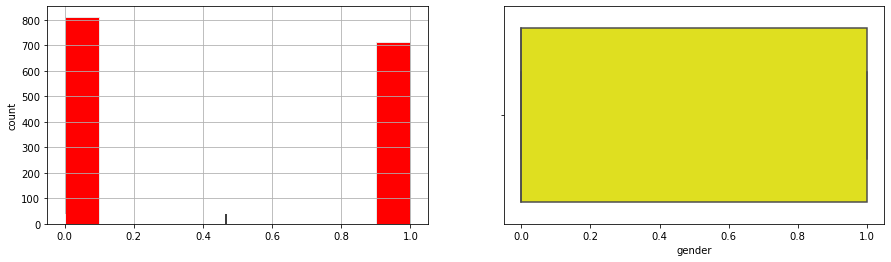

In [56]:
from warnings import filterwarnings
filterwarnings("ignore")
cont_cols = list(df.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10,edgecolor='#E6E6E6', color='Red')
    plt.vlines(df[col].mean(),ymin = 0, ymax = 40,color = 'Black')
    plt.vlines(df[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='Yellow')
    plt.show()

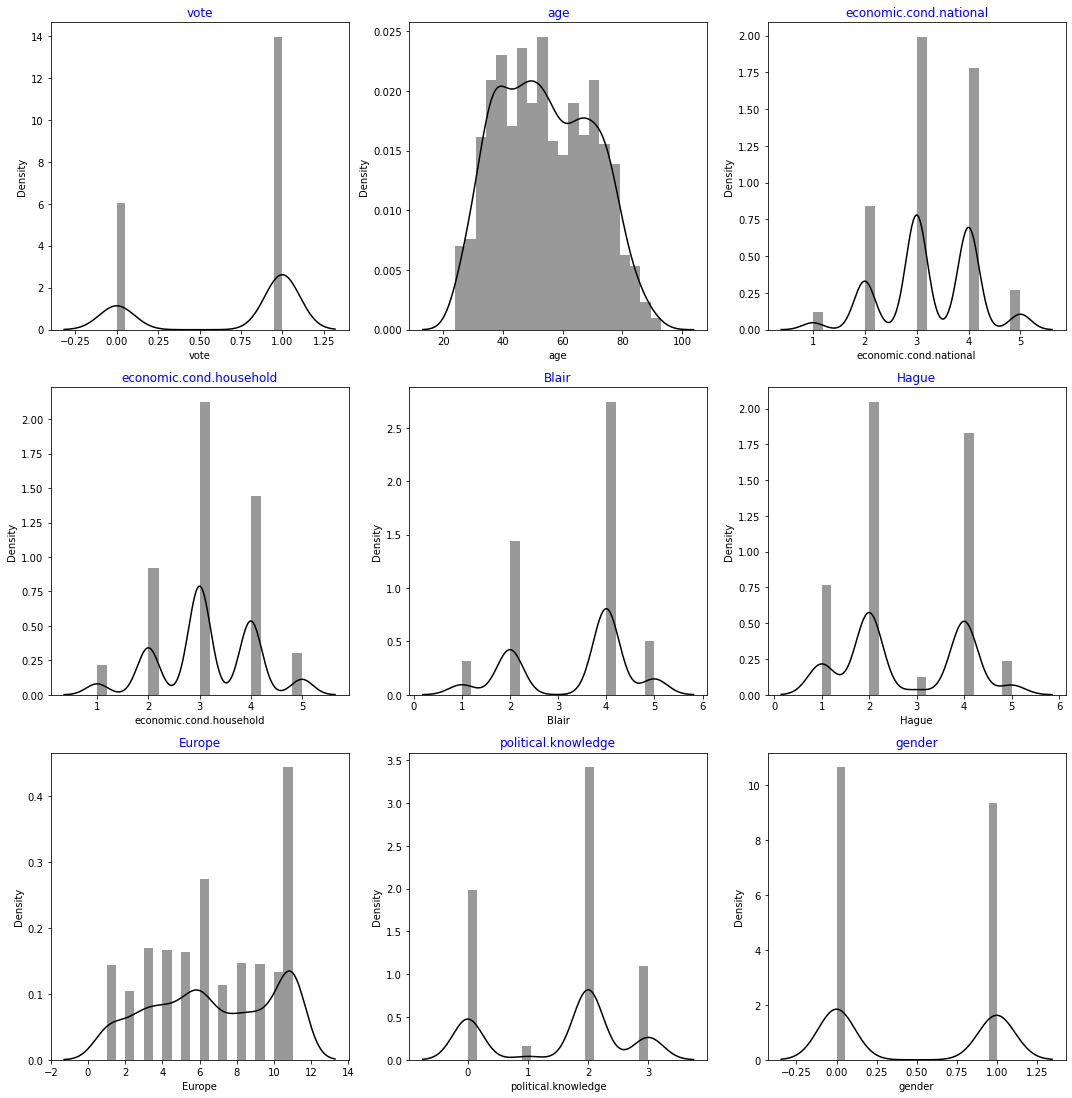

In [57]:
data_scatter=df.copy(deep=True)
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Black')
    ax.set_title(data_scatter.columns[i],color='Blue')
plt.tight_layout()

### Bivariate Analysis

vote vs gender


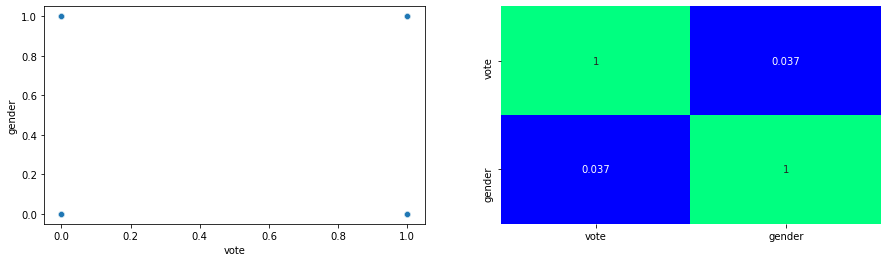

age vs vote


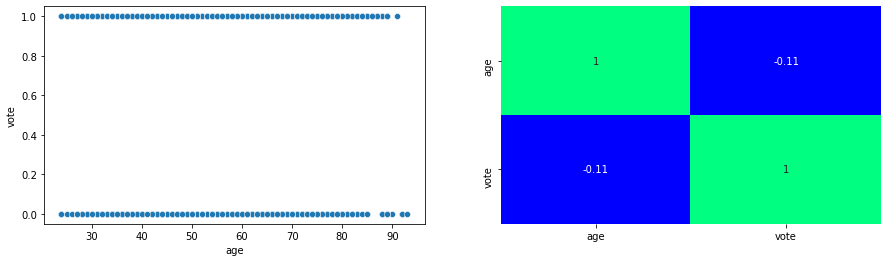

economic.cond.national vs age


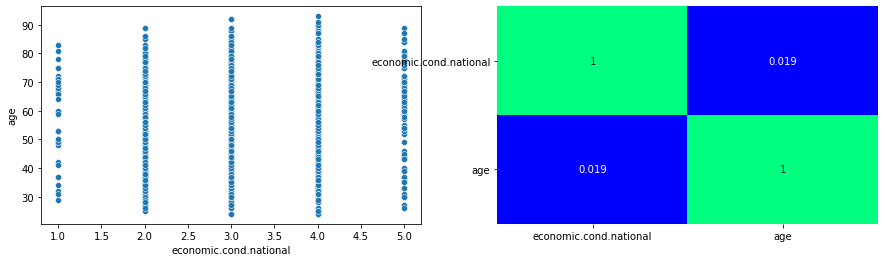

economic.cond.household vs economic.cond.national


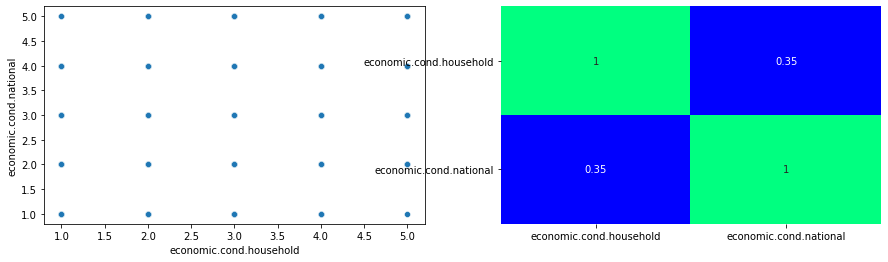

Blair vs economic.cond.household


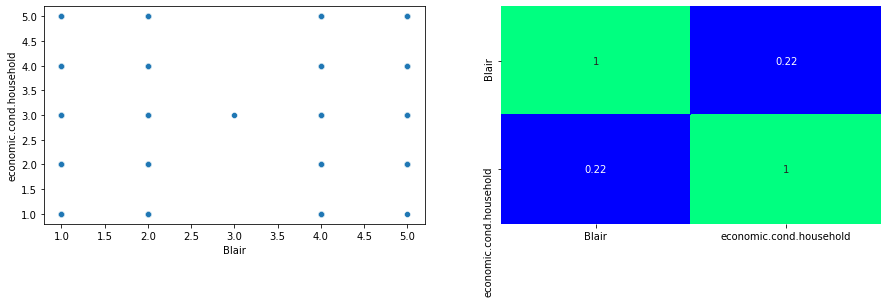

Hague vs Blair


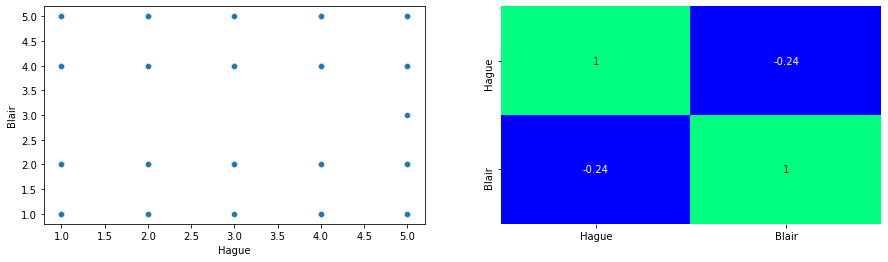

Europe vs Hague


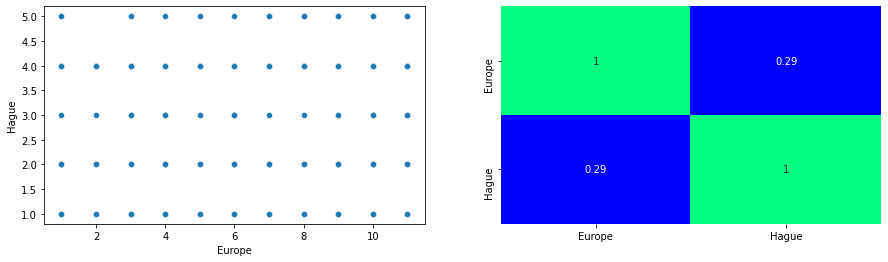

political.knowledge vs Europe


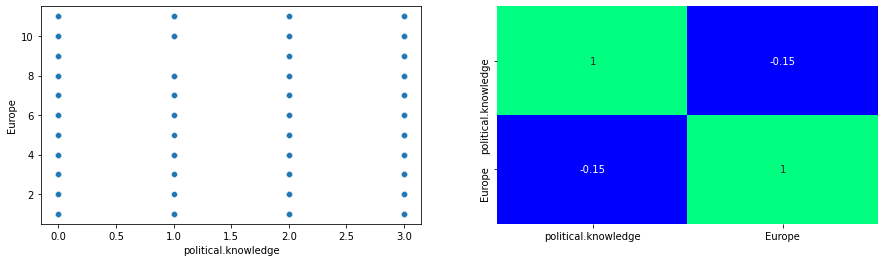

gender vs political.knowledge


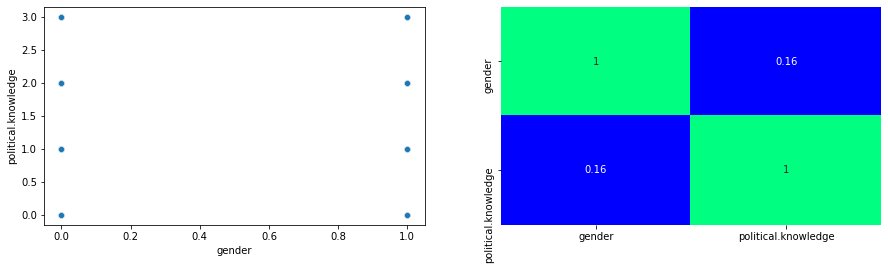

In [58]:
sns.color_palette("tab10")

cont_cols = list(df.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(df[cont_cols[col]],df[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(df[cont_cols[col]],df[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

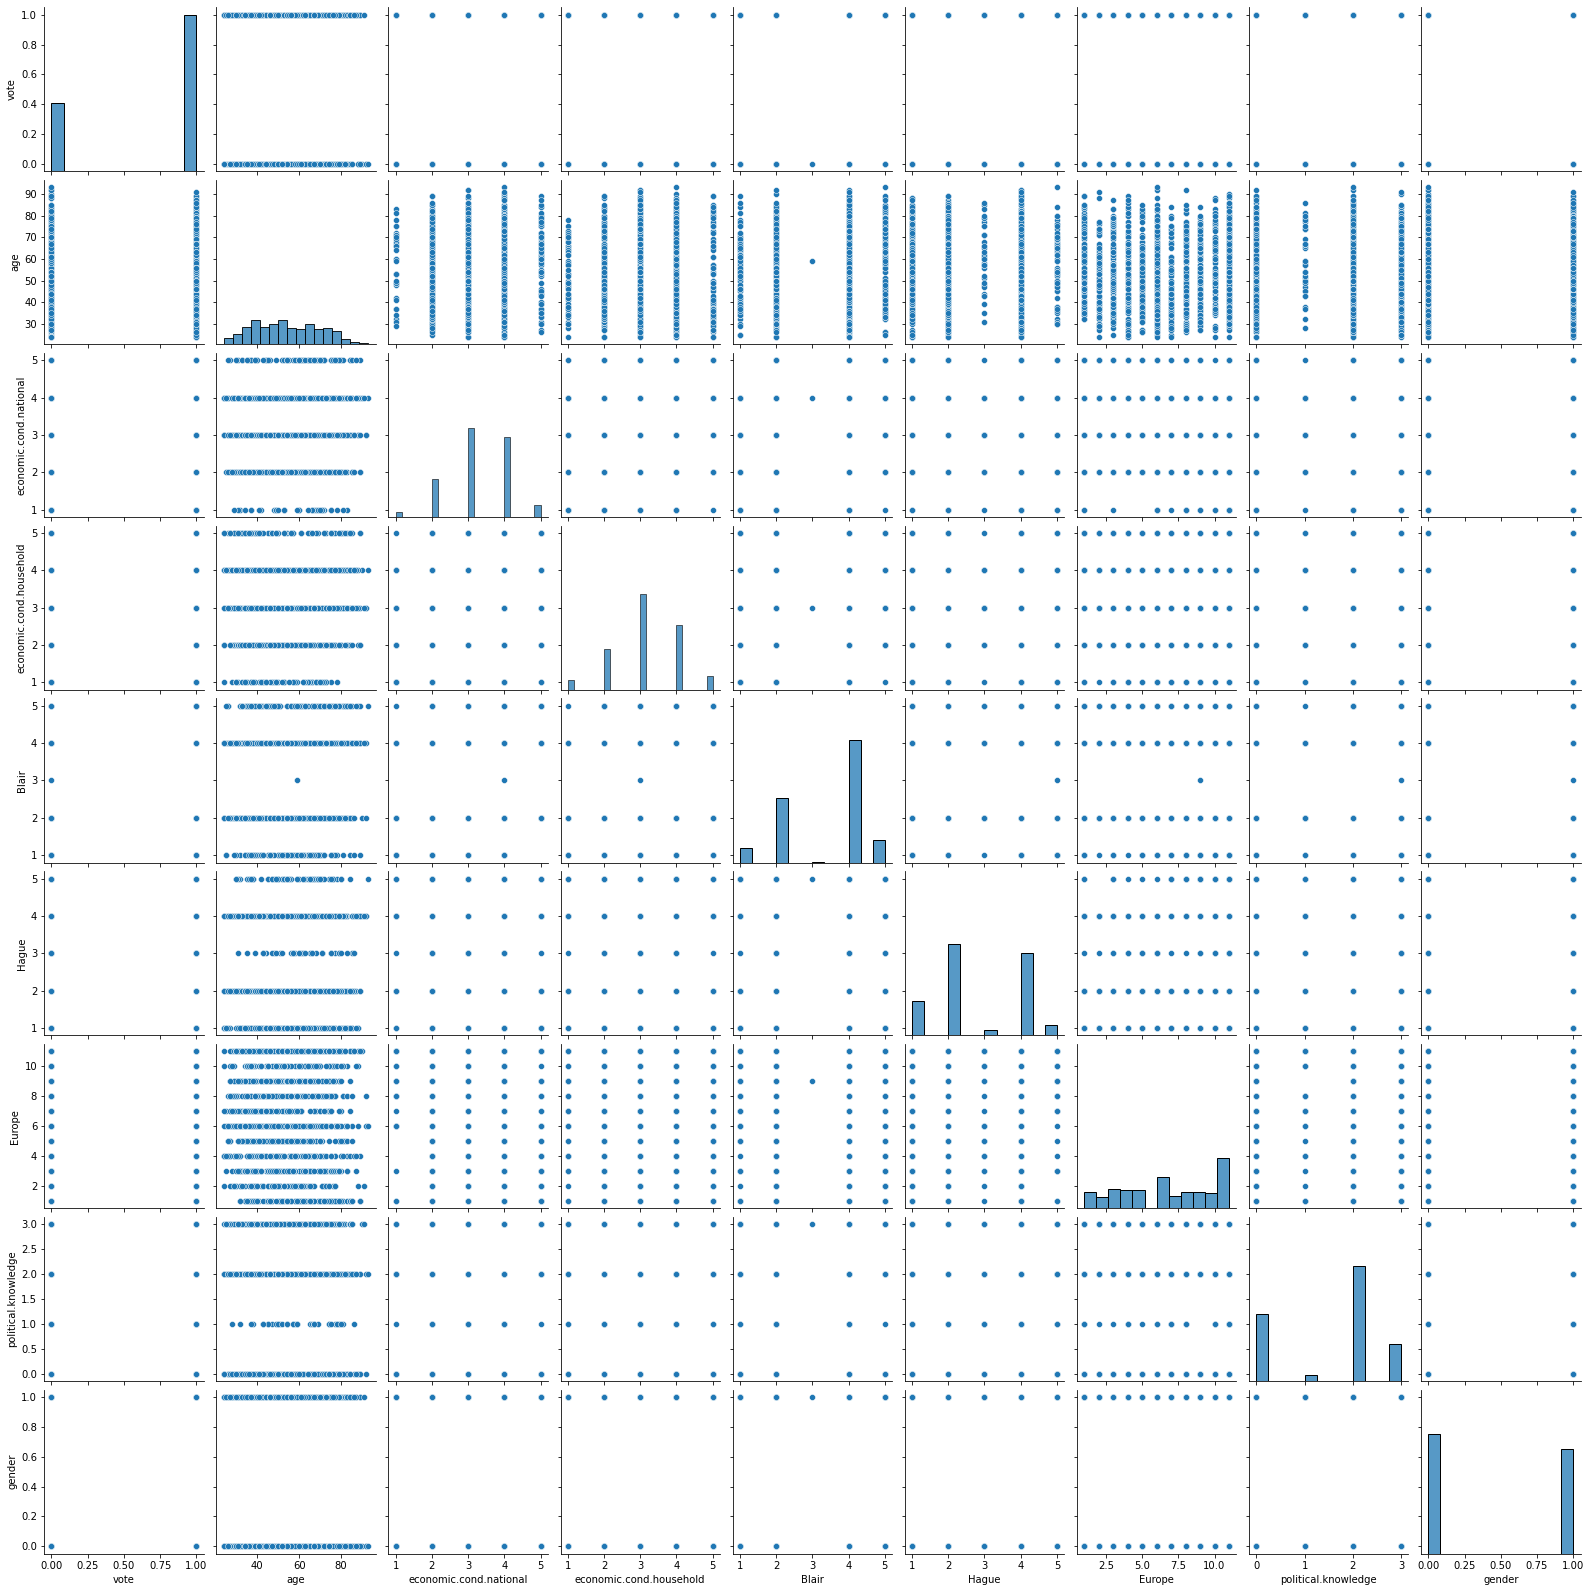

In [59]:
sns.pairplot(df);

### Counter Plot

<AxesSubplot:xlabel='vote', ylabel='count'>

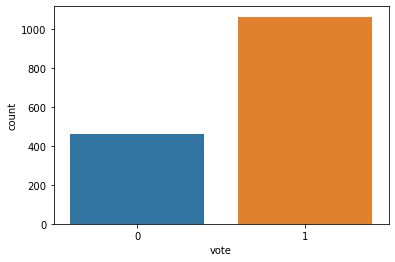

In [60]:
sns.countplot(x=df['vote'])

<AxesSubplot:xlabel='age', ylabel='count'>

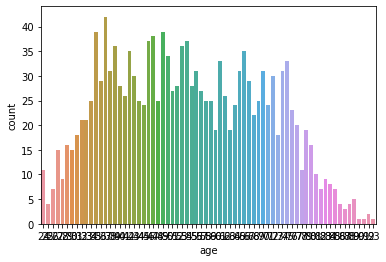

In [61]:
sns.countplot(x=df['age'])

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

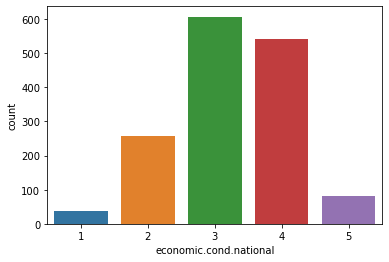

In [62]:
sns.countplot(x=df['economic.cond.national'])

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

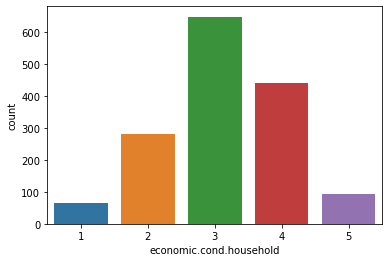

In [63]:
sns.countplot(x=df['economic.cond.household'])

<AxesSubplot:xlabel='Blair', ylabel='count'>

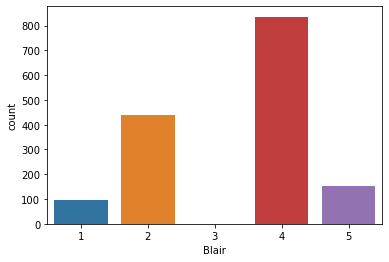

In [64]:
sns.countplot(x=df['Blair'])

<AxesSubplot:xlabel='Hague', ylabel='count'>

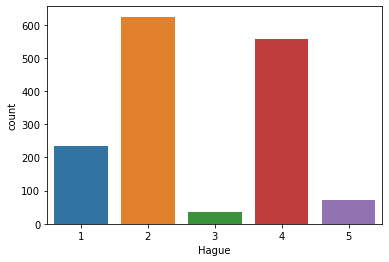

In [65]:
sns.countplot(x=df['Hague'])

<AxesSubplot:xlabel='Europe', ylabel='count'>

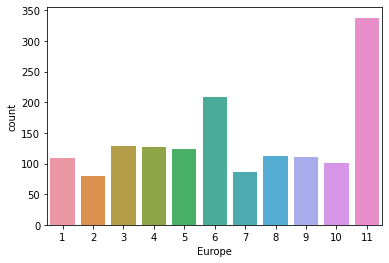

In [66]:
sns.countplot(x=df['Europe'])

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

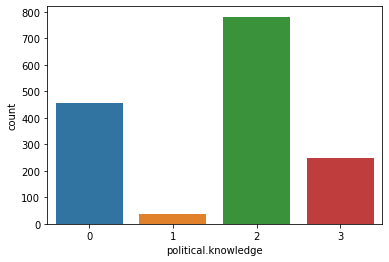

In [67]:
sns.countplot(x=df['political.knowledge'])

<AxesSubplot:xlabel='gender', ylabel='count'>

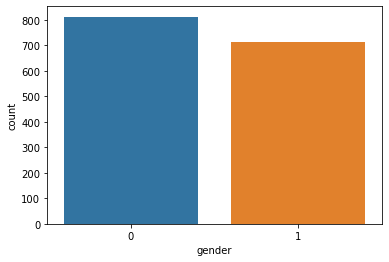

In [68]:
sns.countplot(x=df['gender'])

<AxesSubplot:>

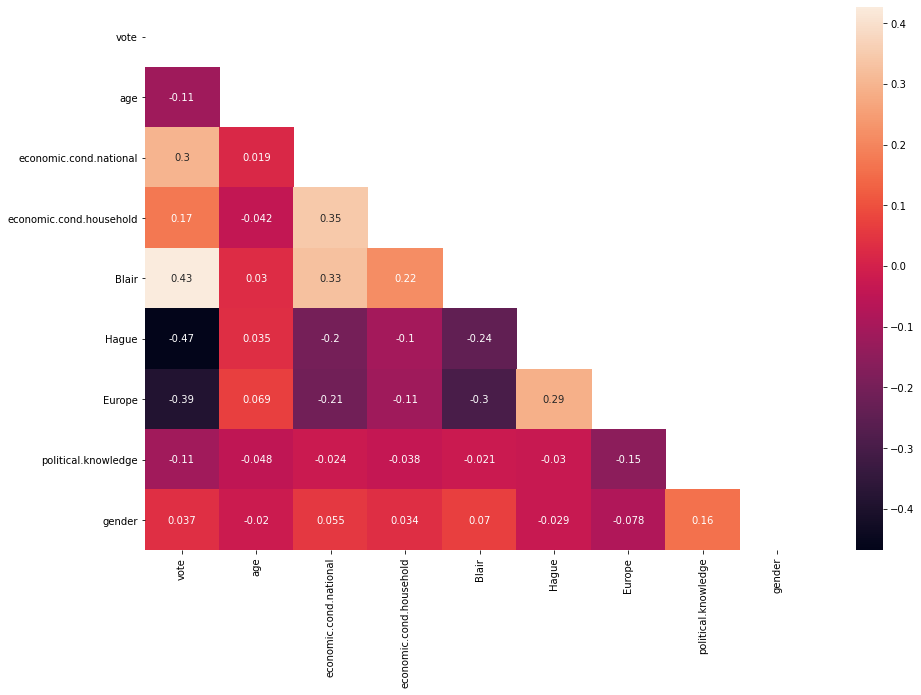

In [69]:
sns.color_palette("tab10")
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot = True,mask=mask)

### Checking for Outliers

<AxesSubplot:>

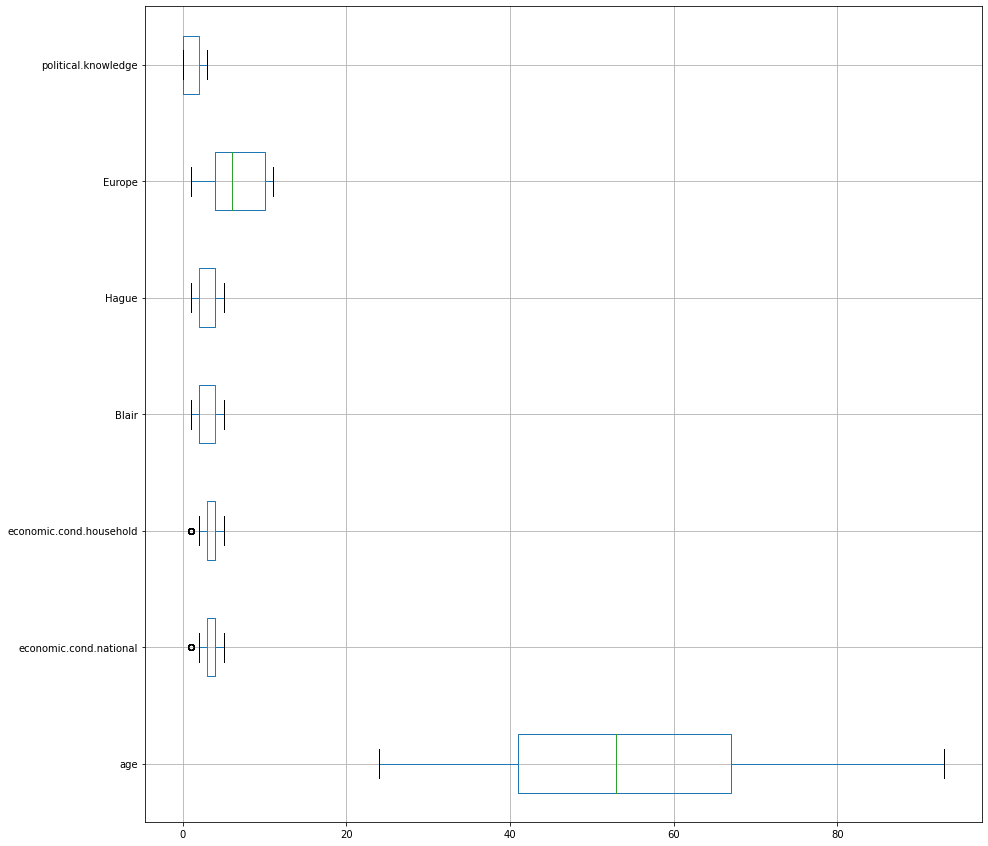

In [70]:
plt.figure(figsize=(15,15))
df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague','Europe','political.knowledge']].boxplot(vert=0)

In [71]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [72]:
for feature in df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague','Europe','political.knowledge']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

<AxesSubplot:>

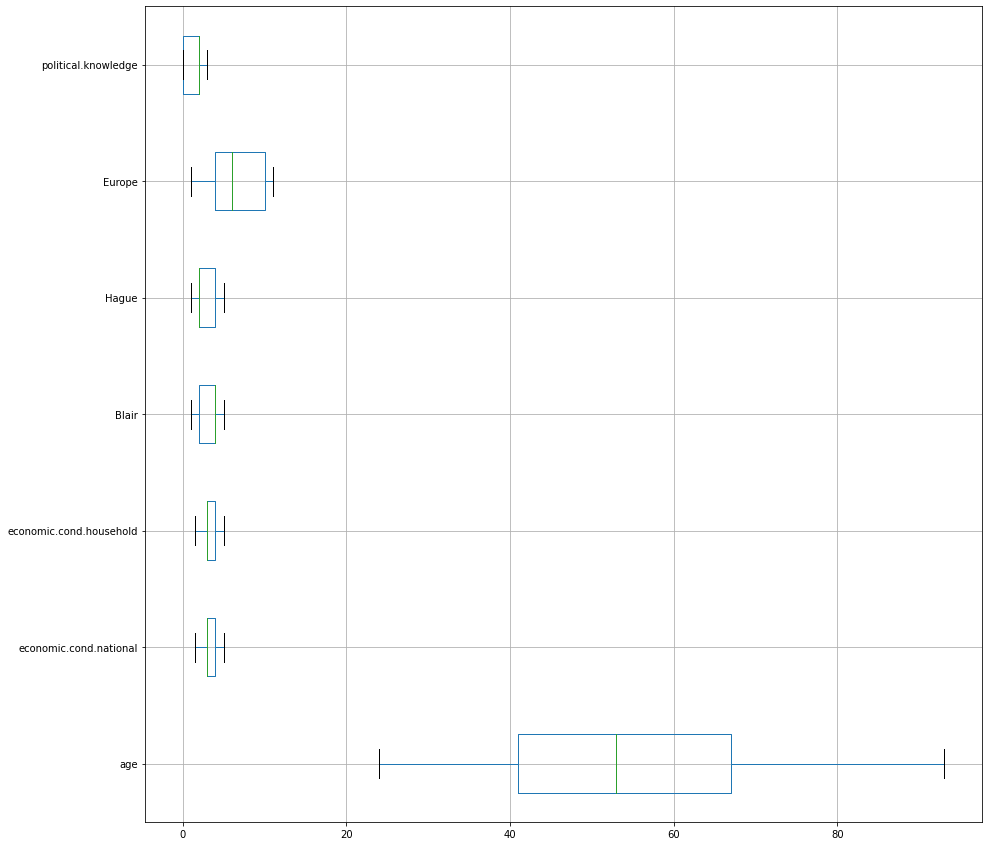

In [73]:
plt.figure(figsize=(15,15))
df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague','Europe','political.knowledge']].boxplot(vert=0)

### Plot the histograms

array([[<AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'economic.cond.national'}>],
       [<AxesSubplot:title={'center':'economic.cond.household'}>,
        <AxesSubplot:title={'center':'Blair'}>,
        <AxesSubplot:title={'center':'Hague'}>],
       [<AxesSubplot:title={'center':'Europe'}>,
        <AxesSubplot:title={'center':'political.knowledge'}>,
        <AxesSubplot:title={'center':'gender'}>]], dtype=object)

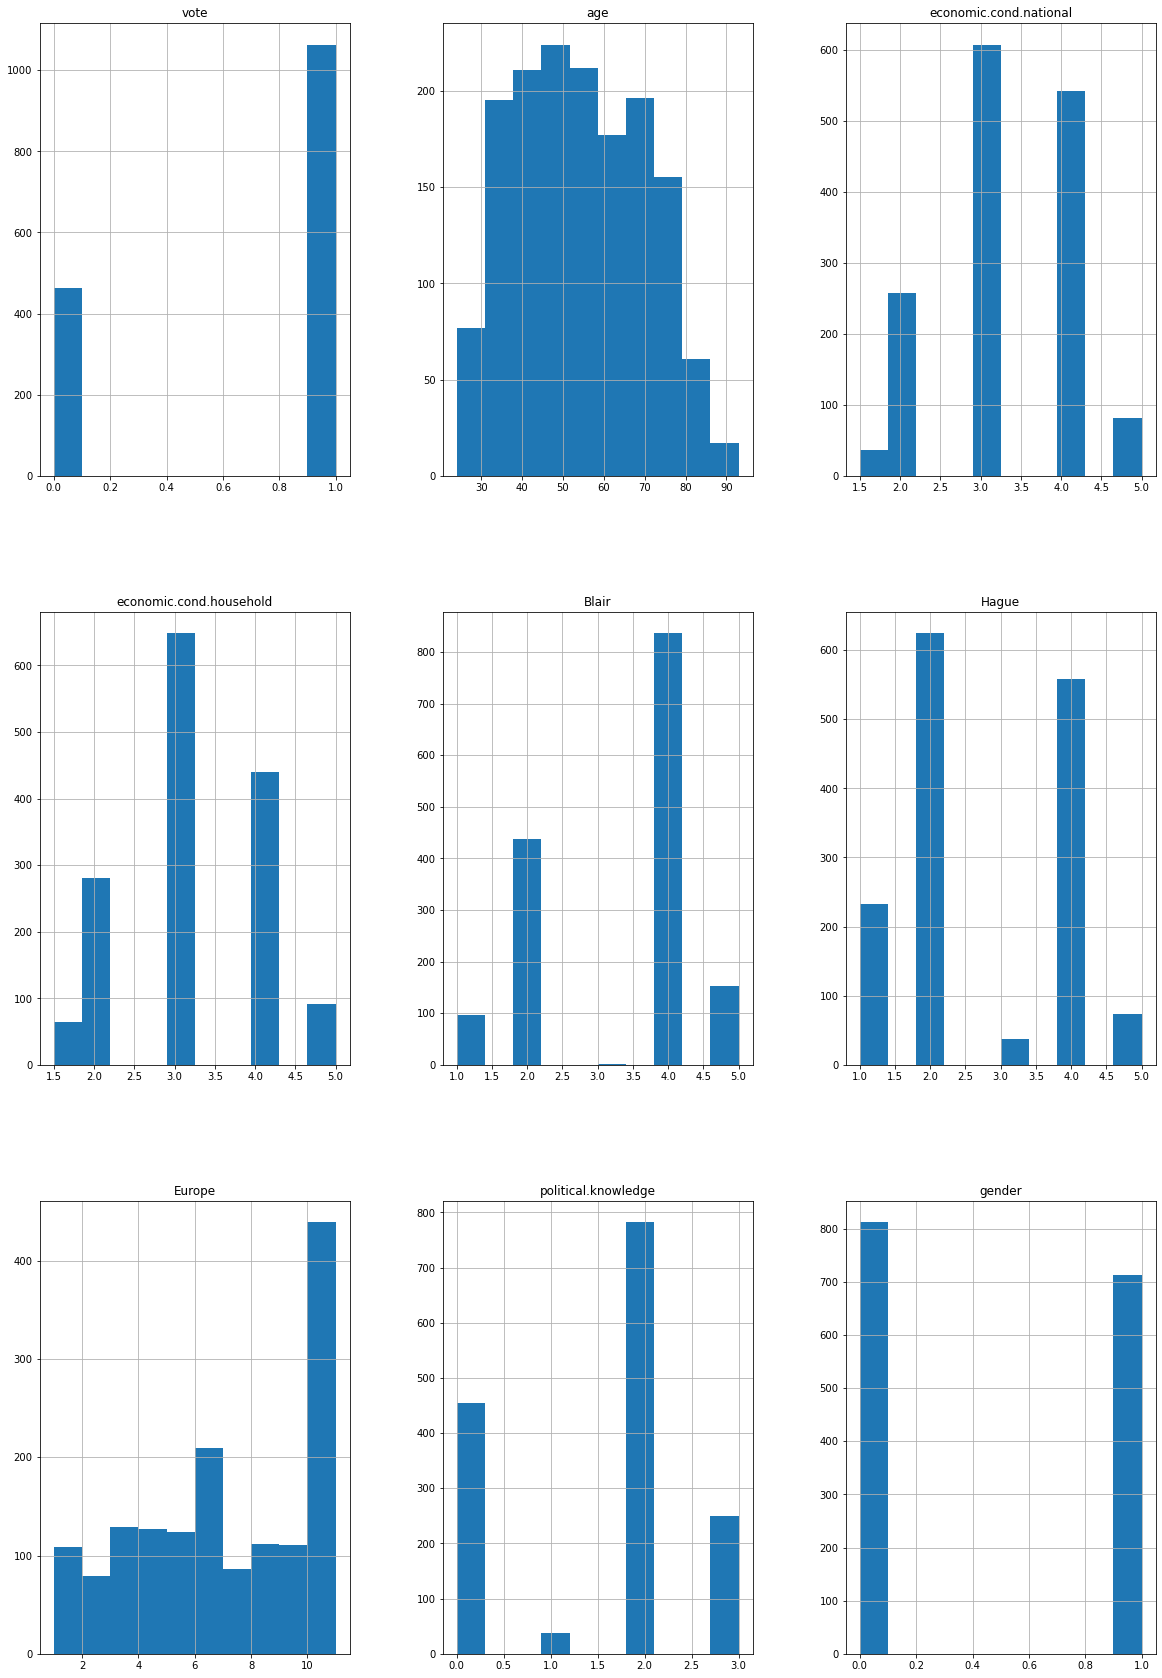

In [74]:
df.hist(figsize=(20,30))

### Correlation plot

In [75]:
corr = df.corr()
corr

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,1.000000,-0.112821,0.302428,0.176843,0.427084,-0.468508,-0.385443,-0.108653,0.037191
age,-0.112821,1.000000,0.022194,-0.047149,0.030218,0.034626,0.068880,-0.048490,-0.019746
economic.cond.national,0.302428,0.022194,1.000000,0.342942,0.324402,-0.198091,-0.206858,-0.029395,0.053982
economic.cond.household,0.176843,-0.047149,0.342942,1.000000,0.216123,-0.101243,-0.114202,-0.039803,0.033786
Blair,0.427084,0.030218,0.324402,0.216123,1.000000,-0.243210,-0.296162,-0.020917,0.070001
Hague,-0.468508,0.034626,-0.198091,-0.101243,-0.243210,1.000000,0.287350,-0.030354,-0.029408
Europe,-0.385443,0.068880,-0.206858,-0.114202,-0.296162,0.287350,1.000000,-0.152364,-0.077520
political.knowledge,-0.108653,-0.048490,-0.029395,-0.039803,-0.020917,-0.030354,-0.152364,1.000000,0.158181
gender,0.037191,-0.019746,0.053982,0.033786,0.070001,-0.029408,-0.077520,0.158181,1.000000


<AxesSubplot:>

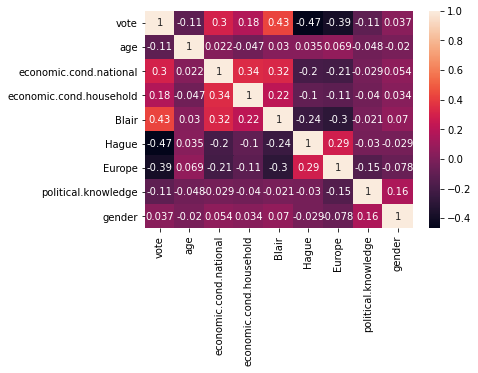

In [76]:
sns.heatmap(corr, annot=True)

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

In [77]:
df.gender=pd.Categorical(df.gender).codes

In [78]:
df = pd.get_dummies(df,drop_first=True)

In [79]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [80]:
# Before Scaling
df.var()

vote                         0.211310
age                        246.842075
economic.cond.national       0.727503
economic.cond.household      0.783731
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
gender                       0.249110
dtype: float64

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
X = StandardScaler()

In [86]:
scaled_df = X.fit_transform(df)

In [87]:
scaled_df

array([[ 0.6592564 , -0.71197344, -0.30262167, ..., -1.43442628,
         0.42264269, -0.9370586 ],
       [ 0.6592564 , -1.15766138,  0.87018151, ..., -0.5243583 ,
         0.42264269,  1.06716912],
       [ 0.6592564 , -1.22133109,  0.87018151, ..., -1.13107028,
         0.42264269,  1.06716912],
       ...,
       [ 0.6592564 , -1.09399168, -0.30262167, ..., -1.43442628,
         0.42264269,  1.06716912],
       [-1.51686051,  0.43408127, -0.30262167, ...,  1.29577767,
         0.42264269,  1.06716912],
       [-1.51686051,  1.26178745, -1.47542486, ...,  1.29577767,
        -1.42414843, -0.9370586 ]])

In [88]:
scaled_df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)
scaled_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.659256,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,0.659256,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,0.659256,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,0.659256,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,0.659256,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [89]:
# After Scaling
scaled_df.var()

vote                       1.000656
age                        1.000656
economic.cond.national     1.000656
economic.cond.household    1.000656
Blair                      1.000656
Hague                      1.000656
Europe                     1.000656
political.knowledge        1.000656
gender                     1.000656
dtype: float64

In [47]:
X=df.drop("vote",axis=1)
y=df.pop("vote")

### Train (70%) - Test (30%) Split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)

In [76]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 8)
Number of rows and columns of the training set for the dependent variable: (1067,)
Number of rows and columns of the test set for the independent variables: (458, 8)
Number of rows and columns of the test set for the dependent variable: (458,)


### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis)

# Logistic Regression¶

In [414]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [415]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1067, 8)
X_test (458, 8)
y_train (1067,)
y_test (458,)


In [416]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [417]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

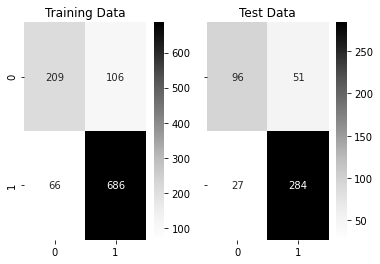

In [418]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [419]:
y_predict = model.predict(X_train)
model_scorelr_train = model.score(X_train, y_train)
print(model_scorelr_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8388003748828491
[[209 106]
 [ 66 686]]
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       315
           1       0.87      0.91      0.89       752

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.84      1067



In [420]:
y_predict = model.predict(X_test)
model_scorelr_test = model.score(X_test, y_test)
print(model_scorelr_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8296943231441049
[[ 96  51]
 [ 27 284]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       147
           1       0.85      0.91      0.88       311

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.80       458
weighted avg       0.83      0.83      0.83       458



In [421]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [422]:
pred_prob_train[:,1]

array([0.98781277, 0.97230633, 0.95935109, ..., 0.93633048, 0.82537529,
       0.90327317])

In [423]:
# Accuracy - Training Data and Test Data
lr_train_acc=model.score(X_train, y_train)
lr_train_acc

0.8388003748828491

In [424]:
lr_test_acc=model.score(X_test, y_test)
lr_test_acc

0.8296943231441049

AUC for the Training Data: 0.886
AUC for the Test Data: 0.897


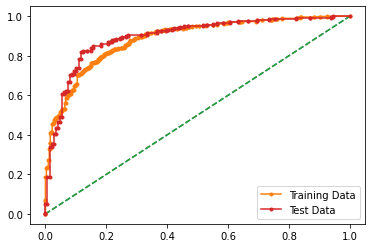

In [425]:
# AUC and ROC for the training data

# calculate AUC
lr_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lr_auc_train)

#  calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lr_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lr_auc_test)

#  calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [426]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [427]:
y_pred = model.predict(X_train)
  
LR_train = round(model.score(X_train, y_train), 2)
  
mae_lr_train = round(metrics.mean_absolute_error(y_train, y_pred), 4)
mse_lr_train = round(metrics.mean_squared_error(y_train, y_pred), 4)

In [428]:
y_pred = model.predict(X_test)
  
LR_test = round(model.score(X_test, y_test), 2)
  
mae_lr_test = round(metrics.mean_absolute_error(y_test, y_pred), 4)
mse_lr_test = round(metrics.mean_squared_error(y_test, y_pred), 4)

In [429]:
lr_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.87
lr_train_recall  0.91
lr_train_f1  0.89


In [430]:
lr_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.85
lr_test_recall  0.91
lr_test_f1  0.88


# Linear Discriminate Analysis

In [431]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [432]:
y_pred=clfLDA.predict(X_train)
model_scoreLDA_train = clfLDA.score(X_train, y_train)
print(model_scoreLDA_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8350515463917526
[[210 105]
 [ 71 681]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       315
           1       0.87      0.91      0.89       752

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [433]:
y_pred=clfLDA.predict(X_test)
model_scoreLDA_test = clfLDA.score(X_test, y_test)
print(model_scoreLDA_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8362445414847162
[[100  47]
 [ 28 283]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       147
           1       0.86      0.91      0.88       311

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.83      0.84      0.83       458



In [434]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = clfLDA.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = clfLDA.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

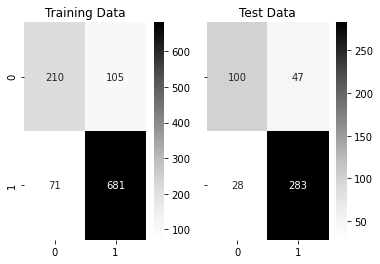

In [435]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Probability prediction for the training and test data

In [436]:
# Training Data Probability Prediction
pred_prob_train = clfLDA.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = clfLDA.predict_proba(X_test)

In [437]:
pred_prob_train[:,1]

array([0.99225724, 0.97527394, 0.96886443, ..., 0.94821353, 0.80079633,
       0.91878991])

In [438]:
# Accuracy - Training Data and Test Data
lda_train_acc=clfLDA.score(X_train, y_train)
lda_train_acc

0.8350515463917526

In [439]:
lda_test_acc=clfLDA.score(X_test, y_test)
lda_test_acc

0.8362445414847162

AUC for the Training Data: 0.885
AUC for the Test Data: 0.897


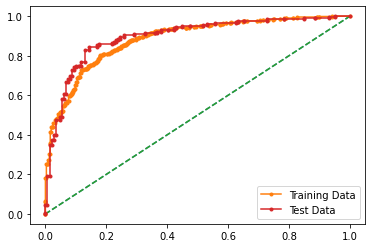

In [440]:
# AUC and ROC for the training data

# calculate AUC
lda_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_auc_train)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_auc_test)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [441]:
y_pred = clfLDA.predict(X_train)
  
LDA_train = round(clfLDA.score(X_train, y_train), 2)
  
mae_lda_train = round(metrics.mean_absolute_error(y_train, y_pred), 4)
mse_lda_train = round(metrics.mean_squared_error(y_train, y_pred), 4)

In [442]:
y_pred = clfLDA.predict(X_test)
  
LDA_test = round(clfLDA.score(X_test, y_test), 2)
  
mae_lda_test = round(metrics.mean_absolute_error(y_test, y_pred), 4)
mse_lda_test = round(metrics.mean_squared_error(y_test, y_pred), 4)

In [443]:
compare_models = pd.DataFrame(
    {  'Model' : ['LR_train', 'LDA_train','LR_test','LDA_test'],
       'Score' : [LR_train, LDA_train, LR_test, LDA_test],
        'MAE'  : [mae_lr_train, mae_lda_train, mae_lr_test, mae_lda_test],
        'MSE'  : [mse_lr_train, mse_lda_train, mse_lr_test, mse_lda_test ],
    'Accuracy' : [lr_train_acc, lda_train_acc, lr_test_acc, lda_test_acc],
        'AUC'  : [lr_auc_train, lda_auc_train, lr_auc_test, lda_auc_test]
    })
  
print(compare_models)

       Model  Score     MAE     MSE  Accuracy       AUC
0   LR_train   0.84  0.1603  0.1603  0.838800  0.885687
1  LDA_train   0.84  0.1649  0.1649  0.835052  0.885324
2    LR_test   0.84  0.1638  0.1638  0.829694  0.896625
3   LDA_test   0.84  0.1638  0.1638  0.836245  0.896712


##### As the Model's error of both the logistic regression and linear discriminate analysis of test data are less compared to the accuracy of the training data.Therefore the model is overfitting 

In [444]:
lda_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.87
lda_train_recall  0.91
lda_train_f1  0.89


In [445]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.86
lda_test_recall  0.91
lda_test_f1  0.88


### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# K-Nearest Neighbours

In [446]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN=KNeighborsClassifier()
clfKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [447]:
y_pred=clfKNN.predict(X_train)
model_scoreKNN_train = clfKNN.score(X_train, y_train)
print(model_scoreKNN_train)
print(metrics.confusion_matrix(y_train, y_pred))
print(metrics.classification_report(y_train, y_pred))

0.8537956888472352
[[222  93]
 [ 63 689]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       315
           1       0.88      0.92      0.90       752

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [448]:
y_pred=clfKNN.predict(X_test)
model_scoreKNN_test = clfKNN.score(X_test, y_test)
print(model_scoreKNN_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.8034934497816594
[[ 86  61]
 [ 29 282]]
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       147
           1       0.82      0.91      0.86       311

    accuracy                           0.80       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.80      0.80      0.80       458



In [449]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = clfKNN.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = clfKNN.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

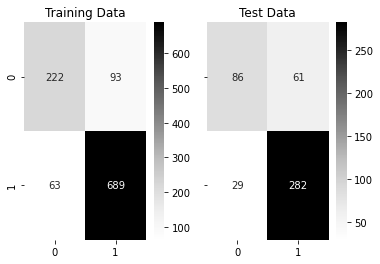

In [450]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Probability prediction for the training and test data

In [451]:
# Training Data Probability Prediction
pred_prob_train = clfKNN.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = clfKNN.predict_proba(X_test)

In [452]:
pred_prob_train[:,1]

array([1. , 0.8, 1. , ..., 0.6, 1. , 0.6])

In [453]:
# Accuracy - Training Data and Test Data
knn_train_acc=clfKNN.score(X_train, y_train)
knn_train_acc

0.8537956888472352

In [454]:
knn_test_acc=clfKNN.score(X_test, y_test)
knn_test_acc

0.8034934497816594

AUC for the Training Data: 0.924
AUC for the Test Data: 0.847


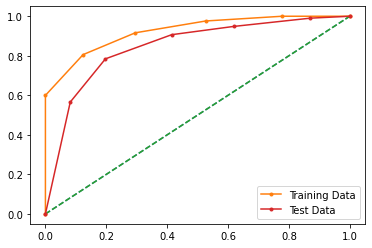

In [455]:
# AUC and ROC for the training data

# calculate AUC
knn_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % knn_auc_train)

#  calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
knn_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % knn_auc_test)

#  calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [456]:
y_pred = clfKNN.predict(X_train)
  
knn_train = round(clfKNN.score(X_train, y_train), 2)
  
mae_knn_train = round(metrics.mean_absolute_error(y_train, y_pred), 4)
mse_knn_train = round(metrics.mean_squared_error(y_train, y_pred), 4)

In [457]:
y_pred = clfKNN.predict(X_test)
  
knn_test = round(clfKNN.score(X_test, y_test), 2)
  
mae_knn_test = round(metrics.mean_absolute_error(y_test, y_pred), 4)
mse_knn_test = round(metrics.mean_squared_error(y_test, y_pred), 4)

In [458]:
knn_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_train_f1=round(df.loc["1"][2],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_precision=round(df.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  0.88
knn_train_recall  0.92
knn_train_f1  0.9


In [459]:
knn_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
knn_test_f1=round(df.loc["1"][2],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_precision=round(df.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.82
knn_test_recall  0.91
knn_test_f1  0.86


# Naive Bayes

In [460]:
from sklearn.naive_bayes import GaussianNB

In [461]:
clfNB =  GaussianNB()
clfNB.fit(X_train, y_train)

GaussianNB()

In [462]:
y_predict = clfNB.predict(X_train)
model_scoreNB_train = clfNB.score(X_train, y_train)
print(model_scoreNB_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8275538894095595
[[221  94]
 [ 90 662]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       315
           1       0.88      0.88      0.88       752

    accuracy                           0.83      1067
   macro avg       0.79      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [463]:
y_predict = clfNB.predict(X_test)
model_scoreNB_test = clfNB.score(X_test, y_test)
print(model_scoreNB_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8471615720524017
[[110  37]
 [ 33 278]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       147
           1       0.88      0.89      0.89       311

    accuracy                           0.85       458
   macro avg       0.83      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458



In [464]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = clfNB.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = clfNB.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

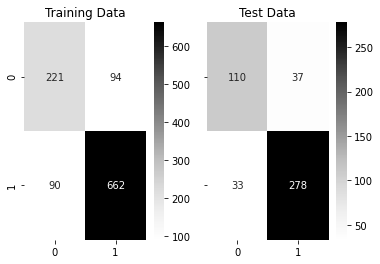

In [465]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Probability prediction for the training and test data

In [466]:
# Training Data Probability Prediction
pred_prob_train = clfNB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = clfNB.predict_proba(X_test)

In [467]:
pred_prob_train[:,1]

array([0.99857292, 0.99234581, 0.98684725, ..., 0.9703591 , 0.90204639,
       0.94454071])

In [468]:
# Accuracy - Training Data and Test Data
nb_train_acc=clfNB.score(X_train, y_train)
nb_train_acc

0.8275538894095595

In [469]:
nb_test_acc=clfNB.score(X_test, y_test)
nb_test_acc

0.8471615720524017

AUC for the Training Data: 0.882
AUC for the Test Data: 0.896


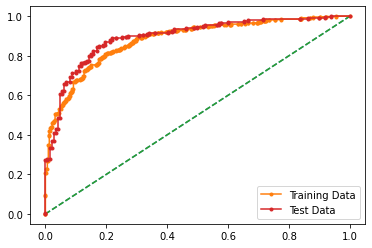

In [470]:
# AUC and ROC for the training data

# calculate AUC
nb_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % nb_auc_train)

#  calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
nb_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % nb_auc_test)

#  calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [471]:
y_pred = clfNB.predict(X_train)
  
nb_train = round(clfNB.score(X_train, y_train), 2)
  
mae_nb_train = metrics.mean_absolute_error(y_train, y_pred)
mse_nb_train = metrics.mean_squared_error(y_train, y_pred)

In [472]:
y_pred = clfNB.predict(X_test)
  
nb_test = round(clfNB.score(X_test, y_test), 2)
  
mae_nb_test = metrics.mean_absolute_error(y_test, y_pred)
mse_nb_test = metrics.mean_squared_error(y_test, y_pred)

In [473]:
compare_models = pd.DataFrame(
    {  'Model' : ['KNN_train', 'NB_train','KNN_test','NB_test'],
       'Score' : [knn_train, nb_train, knn_test, nb_test],
        'MAE'  : [mae_knn_train, mae_nb_train, mae_knn_test, mae_nb_test ],
        'MSE'  : [mse_knn_train, mse_nb_train, mse_knn_test, mse_nb_test],
      'Accuracy' : [knn_train_acc, nb_train_acc, knn_test_acc, nb_test_acc],
        'AUC'  : [knn_auc_train, nb_auc_train, knn_auc_test, nb_auc_test]
    })
  
print(compare_models)

       Model  Score       MAE       MSE  Accuracy       AUC
0  KNN_train   0.85  0.146200  0.146200  0.853796  0.923898
1   NB_train   0.83  0.172446  0.172446  0.827554  0.881567
2   KNN_test   0.80  0.196500  0.196500  0.803493  0.847234
3    NB_test   0.85  0.152838  0.152838  0.847162  0.896100


##### As the Model's error of both the K-Nearest Neighbours and Naive Bayes of test data are less compared to the accuracy of the training data.Therefore the model is overfitting .

In [474]:
nb_metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_train_f1=round(df.loc["1"][2],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_precision=round(df.loc["1"][0],2)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_precision  0.88
nb_train_recall  0.88
nb_train_f1  0.88


In [475]:
nb_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
nb_test_f1=round(df.loc["1"][2],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_precision=round(df.loc["1"][0],2)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_precision  0.88
nb_test_recall  0.89
nb_test_f1  0.89


### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

# Decision Tree Classifier

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree 

In [215]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [216]:
grid_search_dtcl.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid_dtcl = grid_search.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [219]:
dtc_train_char_label = ['no', 'yes']
dtc_tree_regularized = open('dtc_tree_regularized.dot','w')
dtc_dot_data = tree.export_graphviz(best_grid_dtcl, out_file= dtc_tree_regularized , feature_names = list(X_train), class_names = list(dtc_train_char_label))

dtc_tree_regularized.close()
dtc_dot_data

http://webgraphviz.com/

##### There is no Overfitting of data. Hence there is  no need of regularization of data

### Variable Importance

In [220]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.504631
Europe                   0.223178
Blair                    0.160521
political.knowledge      0.109778
age                      0.001892
economic.cond.national   0.000000
economic.cond.household  0.000000
gender                   0.000000


### Predicting on Training and Test dataset

In [213]:
ytrain_predict = best_grid_dtcl.predict(X_train)
ytest_predict = best_grid_dtcl.predict(X_test)

### Getting the Predicted Classes and Probs

In [221]:
ytest_predict
ytest_predict_prob=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.223077,0.776923
1,0.020134,0.979866
2,0.134752,0.865248
3,0.134752,0.865248
4,0.064516,0.935484


### Probability prediction for the training and test data

In [222]:
# Training Data Probability Prediction
pred_prob_train = best_grid_dtcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid_dtcl.predict_proba(X_test)

In [223]:
pred_prob_train[:,1]

array([1.        , 0.82857143, 1.        , ..., 0.82857143, 0.82857143,
       0.82857143])

In [224]:
# Accuracy - Training Data and Test Data
dtcl_train_acc=best_grid_dtcl.score(X_train, y_train)
dtcl_train_acc

0.8181818181818182

In [225]:
dtcl_test_acc=best_grid_dtcl.score(X_test, y_test)
dtcl_test_acc

0.8231441048034934

AUC for the Training Data: 0.872
AUC for the Test Data: 0.875


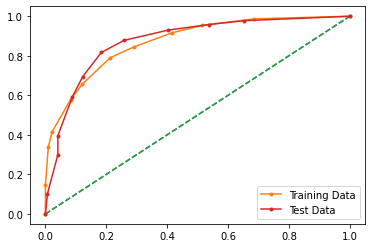

In [226]:
# AUC and ROC for the training data

# calculate AUC
dtcl_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % dtcl_auc_train)

#  calculate roc curve
dtcl_train_fpr, dtcl_train_tpr, dtcl_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtcl_train_fpr, dtcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
dtcl_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % dtcl_auc_test)

#  calculate roc curve
dtcl_test_fpr, dtcl_test_tpr, dtcl_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dtcl_test_fpr, dtcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [228]:
y_predict = best_grid_dtcl.predict(X_train)
model_scoredtcl_train = best_grid_dtcl.score(X_train, y_train)
print(model_scoredtcl_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8181818181818182
[[184 131]
 [ 63 689]]
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       315
           1       0.84      0.92      0.88       752

    accuracy                           0.82      1067
   macro avg       0.79      0.75      0.77      1067
weighted avg       0.81      0.82      0.81      1067



In [229]:
y_predict = best_grid_dtcl.predict(X_test)
model_scoredtcl_test = best_grid_dtcl.score(X_test, y_test)
print(model_scoredtcl_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8231441048034934
[[ 88  59]
 [ 22 289]]
              precision    recall  f1-score   support

           0       0.80      0.60      0.68       147
           1       0.83      0.93      0.88       311

    accuracy                           0.82       458
   macro avg       0.82      0.76      0.78       458
weighted avg       0.82      0.82      0.82       458



In [230]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_grid_dtcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =  best_grid_dtcl.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

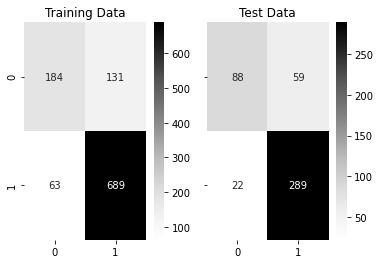

In [231]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [232]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.84
cart_train_recall  0.92
cart_train_f1  0.88


In [233]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.83
cart_test_recall  0.93
cart_test_f1  0.88


### Cart Conclusion

#### Train Data:
AUC: 87%    
Accuracy: 81%     
Precision: 84%       
Recall: 92%           
f1-Score: 88%        

#### Test Data:
AUC: 87%            
Accuracy: 82%           
Precision: 83%          
Recall: 93%       
f1-Score: 88%       

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Random Forest Classifier

In [234]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [235]:
grid_search_rfcl.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [236]:
grid_search_rfcl.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [237]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [238]:
best_grid_rfcl

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

### Predicting the Training and Testing data

In [239]:
ytrain_predict = best_grid_rfcl.predict(X_train)
ytest_predict = best_grid_rfcl.predict(X_test)

### Getting the Predicted Classes and Probs

In [240]:
ytest_predict
ytest_predict_prob=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.332875,0.667125
1,0.025292,0.974708
2,0.108960,0.891040
3,0.209385,0.790615
4,0.034106,0.965894


### Probability prediction for the training and test data

In [241]:
# Training Data Probability Prediction
pred_prob_train = best_grid_rfcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid_rfcl.predict_proba(X_test)

In [242]:
pred_prob_train[:,1]

array([0.9984809 , 0.86988601, 0.99413622, ..., 0.83180772, 0.77888115,
       0.84042612])

In [243]:
# Accuracy - Training Data and Test Data
rfcl_train_acc=best_grid_rfcl.score(X_train, y_train)
rfcl_train_acc

0.8500468603561387

In [244]:
rfcl_test_acc=best_grid_rfcl.score(X_test, y_test)
rfcl_test_acc

0.8253275109170306

AUC for the Training Data: 0.914
AUC for the Test Data: 0.896


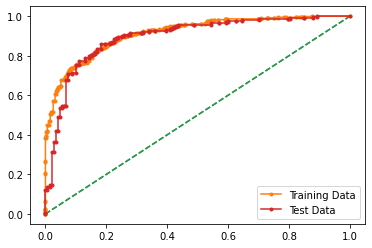

In [245]:
# AUC and ROC for the training data

# calculate AUC
rfcl_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % rfcl_auc_train)

#  calculate roc curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
rfcl_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % rfcl_auc_test)

#  calculate roc curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [246]:
y_predict = best_grid_rfcl.predict(X_train)
model_scorerfcl_train = best_grid_rfcl.score(X_train, y_train)
print(model_scorerfcl_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8500468603561387
[[209 106]
 [ 54 698]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       315
           1       0.87      0.93      0.90       752

    accuracy                           0.85      1067
   macro avg       0.83      0.80      0.81      1067
weighted avg       0.85      0.85      0.85      1067



In [247]:
y_predict = best_grid_rfcl.predict(X_test)
model_scorerfcl_test = best_grid_rfcl.score(X_test, y_test)
print(model_scorerfcl_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8253275109170306
[[ 90  57]
 [ 23 288]]
              precision    recall  f1-score   support

           0       0.80      0.61      0.69       147
           1       0.83      0.93      0.88       311

    accuracy                           0.83       458
   macro avg       0.82      0.77      0.79       458
weighted avg       0.82      0.83      0.82       458



In [249]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_grid_rfcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =  best_grid_rfcl.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

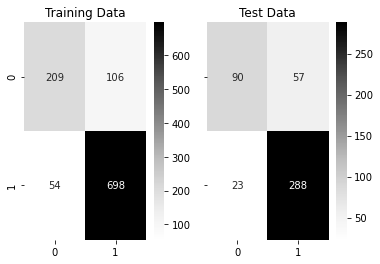

In [250]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [251]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.87
rf_train_recall  0.93
rf_train_f1  0.9


In [252]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.83
rf_test_recall  0.93
rf_test_f1  0.88


In [254]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.373798
Europe                   0.211196
Blair                    0.187102
political.knowledge      0.115676
age                      0.061091
economic.cond.national   0.039440
economic.cond.household  0.010359
gender                   0.001338


### Random Forest Conclusion

#### Train Data:
AUC: 91%    
Accuracy: 85%     
Precision: 87%       
Recall: 93%           
f1-Score: 90%        

#### Test Data:
AUC: 89%            
Accuracy: 82%           
Precision: 83%          
Recall: 93%       
f1-Score: 88%       

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Neural Network Classifier

In [255]:
 param_grid = {
    'hidden_layer_sizes': [100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [256]:
grid_search_nncl.fit(X_train, y_train)
grid_search_nncl.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [258]:
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

### Predicting the Training and Testing data

In [259]:
ytrain_predict = best_grid_nncl.predict(X_train)
ytest_predict = best_grid_nncl.predict(X_test)

### Getting the Predicted Classes and Probs

In [260]:
ytest_predict
ytest_predict_prob=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.190894,0.809106
1,0.146348,0.853652
2,0.416052,0.583948
3,0.178609,0.821391
4,0.027167,0.972833


### Probability prediction for the training and test data

In [261]:
# Training Data Probability Prediction
pred_prob_train = best_grid_nncl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = best_grid_nncl.predict_proba(X_test)

In [262]:
pred_prob_train[:,1]

array([0.94020565, 0.91310697, 0.88070647, ..., 0.88260689, 0.80399691,
       0.85169287])

In [263]:
# Accuracy - Training Data and Test Data
nncl_train_acc=best_grid_nncl.score(X_train, y_train)
nncl_train_acc

0.7891283973758201

In [264]:
nncl_test_acc=best_grid_nncl.score(X_test, y_test)
nncl_test_acc

0.8013100436681223

AUC for the Training Data: 0.854
AUC for the Test Data: 0.870


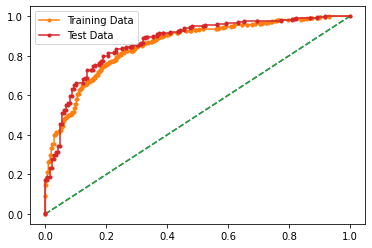

In [265]:
# AUC and ROC for the training data

# calculate AUC
nncl_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % nncl_auc_train)

#  calculate roc curve
nncl_train_fpr, nncl_train_tpr, nncl_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nncl_train_fpr, nncl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
nncl_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % nncl_auc_test)

#  calculate roc curve
nncl_test_fpr, nncl_test_tpr, nncl_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nncl_test_fpr, nncl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [266]:
y_predict = best_grid_nncl.predict(X_train)
model_scorenncl_train = best_grid_nncl.score(X_train, y_train)
print(model_scorenncl_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.7891283973758201
[[139 176]
 [ 49 703]]
              precision    recall  f1-score   support

           0       0.74      0.44      0.55       315
           1       0.80      0.93      0.86       752

    accuracy                           0.79      1067
   macro avg       0.77      0.69      0.71      1067
weighted avg       0.78      0.79      0.77      1067



In [267]:
y_predict = best_grid_nncl.predict(X_test)
model_scorenncl_test = best_grid_nncl.score(X_test, y_test)
print(model_scorenncl_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8013100436681223
[[ 72  75]
 [ 16 295]]
              precision    recall  f1-score   support

           0       0.82      0.49      0.61       147
           1       0.80      0.95      0.87       311

    accuracy                           0.80       458
   macro avg       0.81      0.72      0.74       458
weighted avg       0.80      0.80      0.78       458



In [268]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = best_grid_nncl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test =  best_grid_nncl.predict(X_test)

### Training Data and Test Data Confusion Matrix Comparison

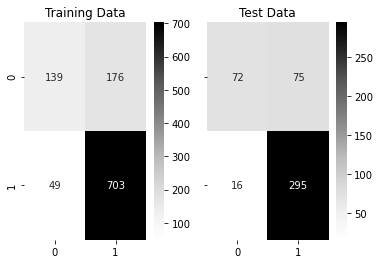

In [269]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [271]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.8
nn_train_recall  0.93
nn_train_f1  0.86


In [272]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.8
nn_test_recall  0.95
nn_test_f1  0.87


### Neural Network Conclusion
#### Train Data:          
AUC: 85%       
Accuracy: 78%     
Precision: 80%  
Recall: 93
f1-Score: 86%       

#### Test Data:         
AUC: 87%          
Accuracy: 80%       
Precision: 80%  
Recall: 95%
f1-Score: 87%          

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# Ensemble:Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [355]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl.fit(X_train, y_train)

BaggingClassifier(n_estimators=50, random_state=1)

In [356]:
y_predict = bgcl.predict(X_train)
model_scorebc_train = bgcl.score(X_train, y_train)
print(model_scorebc_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.9990627928772259
[[314   1]
 [  0 752]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       752

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [357]:
y_predict = bgcl.predict(X_test)
model_scorebc_test = bgcl.score(X_test, y_test)
print(model_scorebc_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8384279475982532
[[ 98  49]
 [ 25 286]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       147
           1       0.85      0.92      0.89       311

    accuracy                           0.84       458
   macro avg       0.83      0.79      0.81       458
weighted avg       0.84      0.84      0.83       458



In [358]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = bgcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = bgcl.predict(X_test)

### Training data and Test Data confusion matrix comparison

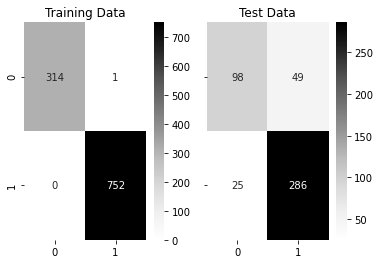

In [359]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Prediction probability for the train and test data

In [360]:
# Training Data Probability Prediction
pred_prob_train = bgcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = bgcl.predict_proba(X_test)

In [361]:
pred_prob_train[:,1]

array([1.  , 0.86, 1.  , ..., 0.5 , 0.92, 0.86])

In [362]:
# Accuracy - Training Data and Test Data
bgcl_train_acc=bgcl.score(X_train, y_train)
bgcl_train_acc

0.9990627928772259

In [363]:
bgcl_test_acc=bgcl.score(X_test, y_test)
bgcl_test_acc

0.8384279475982532

AUC for the Training Data: 1.000
AUC for the Test Data: 0.885


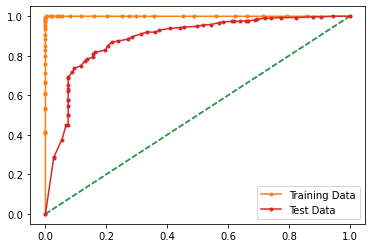

In [364]:
# AUC and ROC for the training data

# calculate AUC
bgcl_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % bgcl_auc_train)

#  calculate roc curve
bgcl_train_fpr, bgcl_train_tpr, bgcl_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_train_fpr, bgcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
bgcl_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % bgcl_auc_test)

#  calculate roc curve
bgcl_test_fpr, bgcl_test_tpr, bgcl_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bgcl_test_fpr, bgcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [365]:
bg_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(bg_metrics).transpose()
bg_train_precision=round(df.loc["1"][0],2)
bg_train_recall=round(df.loc["1"][1],2)
bg_train_f1=round(df.loc["1"][2],2)
print ('bg_train_precision ',bg_train_precision)
print ('bg_train_recall ',bg_train_recall)
print ('bg_train_f1 ',bg_train_f1)

bg_train_precision  1.0
bg_train_recall  1.0
bg_train_f1  1.0


In [366]:
bg_metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(bg_metrics).transpose()
bg_test_precision=round(df.loc["1"][0],2)
bg_test_recall=round(df.loc["1"][1],2)
bg_test_f1=round(df.loc["1"][2],2)
print ('bg_test_precision ',bg_test_precision)
print ('bg_test_recall ',bg_test_recall)
print ('bg_test_f1 ',bg_test_f1)

bg_test_precision  0.85
bg_test_recall  0.92
bg_test_f1  0.89


# Ensemble: Ada Boosting

In [327]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [328]:
y_predict = clfADB.predict(X_train)
model_scoreAB_train = clfADB.score(X_train, y_train)
print(model_scoreAB_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.8444236176194939
[[217  98]
 [ 68 684]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       315
           1       0.87      0.91      0.89       752

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [329]:
y_predict = clfADB.predict(X_test)
model_scoreAB_test = clfADB.score(X_test, y_test)
print(model_scoreAB_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8362445414847162
[[ 98  49]
 [ 26 285]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       147
           1       0.85      0.92      0.88       311

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



In [339]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train =clfADB.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = clfADB.predict(X_test)

### Training data and Test Data confusion matrix comparison

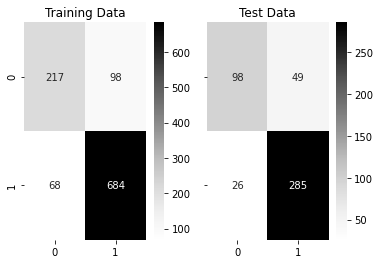

In [331]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Prediction probability of Train and Test data

In [332]:
# Training Data Probability Prediction
pred_prob_train = clfADB.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = clfADB.predict_proba(X_test)

In [333]:
pred_prob_train[:,1]

array([0.52052472, 0.51633335, 0.51205378, ..., 0.5053607 , 0.5088085 ,
       0.50691485])

In [334]:
# Accuracy - Training Data and Test Data
ADB_train_acc=clfADB.score(X_train, y_train)
ADB_train_acc

0.8444236176194939

In [335]:
ADB_test_acc=clfADB.score(X_test, y_test)
ADB_test_acc

0.8362445414847162

AUC for the Training Data: 0.911
AUC for the Test Data: 0.889


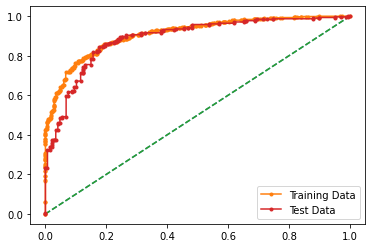

In [336]:
# AUC and ROC for the training data

# calculate AUC
ADB_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ADB_auc_train)

#  calculate roc curve
ADB_train_fpr, ADB_train_tpr, ADB_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ADB_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ADB_auc_test)

#  calculate roc curve
ADB_test_fpr, ADB_test_tpr, ADB_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [340]:
ADB_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_train_precision=round(df.loc["1"][0],2)
ADB_train_recall=round(df.loc["1"][1],2)
ADB_train_f1=round(df.loc["1"][2],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_precision  0.87
ADB_train_recall  0.91
ADB_train_f1  0.89


In [341]:
ADB_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision=round(df.loc["1"][0],2)
ADB_test_recall=round(df.loc["1"][1],2)
ADB_test_f1=round(df.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_precision  0.85
ADB_test_recall  0.92
ADB_test_f1  0.88


# Ensemble: Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [342]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=1)

In [343]:
y_predict = gbcl.predict(X_train)
model_scoreGB_train = gbcl.score(X_train, y_train)
print(model_scoreGB_train)
print(metrics.confusion_matrix(y_train, y_predict))
print(metrics.classification_report(y_train, y_predict))

0.865979381443299
[[227  88]
 [ 55 697]]
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       315
           1       0.89      0.93      0.91       752

    accuracy                           0.87      1067
   macro avg       0.85      0.82      0.83      1067
weighted avg       0.86      0.87      0.86      1067



In [344]:
y_predict = gbcl.predict(X_test)
model_scoreGB_test = gbcl.score(X_test, y_test)
print(model_scoreGB_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8493449781659389
[[100  47]
 [ 22 289]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       147
           1       0.86      0.93      0.89       311

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.85      0.85       458



In [345]:
#Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = gbcl.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = gbcl.predict(X_test)

### Training data and Test Data confusion matrix comparison

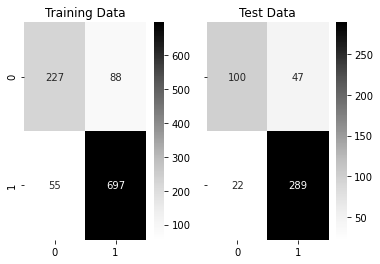

In [346]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Prediction probability of Train and Test data

In [347]:
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

In [348]:
pred_prob_train[:,1]

array([0.97998522, 0.95007347, 0.96522825, ..., 0.80131203, 0.87967856,
       0.83635049])

In [349]:
# Accuracy - Training Data and Test Data
gbcl_train_acc=gbcl.score(X_train, y_train)
gbcl_train_acc

0.865979381443299

In [350]:
gbcl_test_acc=gbcl.score(X_test, y_test)
gbcl_test_acc

0.8493449781659389

AUC for the Training Data: 0.933
AUC for the Test Data: 0.908


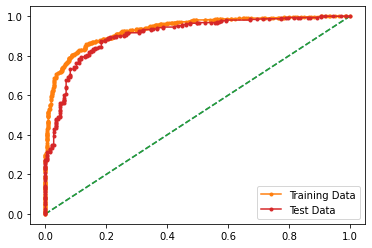

In [352]:
# AUC and ROC for the training data

# calculate AUC
gbcl_auc_train = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % gbcl_auc_train)

#  calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
gbcl_auc_test = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % gbcl_auc_test)

#  calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_test_fpr, gbcl_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [353]:
GB_metrics=classification_report(y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(GB_metrics).transpose()
GB_train_precision=round(df.loc["1"][0],2)
GB_train_recall=round(df.loc["1"][1],2)
GB_train_f1=round(df.loc["1"][2],2)
print ('GB_train_precision ',GB_train_precision)
print ('GB_train_recall ',GB_train_recall)
print ('GB_train_f1 ',GB_train_f1)

GB_train_precision  0.89
GB_train_recall  0.93
GB_train_f1  0.91


In [354]:
GB_metrics=classification_report(y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(GB_metrics).transpose()
GB_test_precision=round(df.loc["1"][0],2)
GB_test_recall=round(df.loc["1"][1],2)
GB_test_f1=round(df.loc["1"][2],2)
print ('GB_test_precision ',GB_test_precision)
print ('GB_test_recall ',GB_test_recall)
print ('GB_test_f1 ',GB_test_f1)

GB_test_precision  0.86
GB_test_recall  0.93
GB_test_f1  0.89


On comparing all the ensemble techniques from the above figure, Bagging Classifier model performs good.

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

# Final Conclusion

### Comparison of the performance metrics from the  models

In [476]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[dtcl_train_acc,dtcl_auc_train,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[dtcl_test_acc,dtcl_auc_test,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rfcl_train_acc,rfcl_auc_train,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rfcl_test_acc,rfcl_auc_test,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nncl_train_acc,nncl_auc_train,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nncl_test_acc,nncl_auc_test,nn_test_recall,nn_test_precision,nn_test_f1],
        'LR Train':[lr_train_acc,lr_auc_train,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_auc_test,lr_test_recall,lr_test_precision,lr_test_f1],
          'LDA Train':[lda_train_acc,lda_auc_train,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_auc_test,lda_test_recall,lda_test_precision,lda_test_f1], 
        'KNN Train':[knn_train_acc,knn_auc_train,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_auc_test,knn_test_recall,knn_test_precision,knn_test_f1], 
         'NB Train':[nb_train_acc,nb_auc_train,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_auc_test,nb_test_recall,nb_test_precision,nb_test_f1],            
                    
                    },index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test
Accuracy,0.82,0.82,0.85,0.83,0.79,0.80,0.84,0.83,0.84,0.84,0.85,0.80,0.83,0.85
AUC,0.87,0.87,0.91,0.90,0.85,0.87,0.89,0.90,0.89,0.90,0.92,0.85,0.88,0.90
Recall,0.92,0.93,0.93,0.93,0.93,0.95,0.91,0.91,0.91,0.91,0.92,0.91,0.88,0.89
Precision,0.84,0.83,0.87,0.83,0.80,0.80,0.87,0.85,0.87,0.86,0.88,0.82,0.88,0.88
F1 Score,0.88,0.88,0.90,0.88,0.86,0.87,0.89,0.88,0.89,0.88,0.90,0.86,0.88,0.89


### Ensemble techniques

In [477]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'Bagging Classifier Train':[bgcl_train_acc,bgcl_auc_train,bg_train_recall,bg_train_precision,bg_train_f1],
        'Bagging Classifier Test':[bgcl_test_acc,bgcl_auc_test,bg_test_recall,bg_test_precision,bg_test_f1],
        'Ada Boosting Train':[ADB_train_acc,ADB_auc_train,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'Ada Boosting Test':[ADB_test_acc,ADB_auc_test,ADB_test_recall,ADB_test_precision,ADB_test_f1],
        'Gradient Boosting Train':[gbcl_train_acc,gbcl_auc_train,GB_train_recall,GB_train_precision,GB_train_f1],
        'Gradient Boosting Test':[gbcl_test_acc,gbcl_auc_test,GB_test_recall,GB_test_precision,GB_test_f1],    
                    },index=index)
round(data,2)

,Bagging Classifier Train,Bagging Classifier Test,Ada Boosting Train,Ada Boosting Test,Gradient Boosting Train,Gradient Boosting Test
Accuracy,1.0,0.84,0.84,0.84,0.87,0.85
AUC,1.0,0.89,0.91,0.89,0.93,0.91
Recall,1.0,0.92,0.91,0.92,0.93,0.93
Precision,1.0,0.85,0.87,0.85,0.89,0.86
F1 Score,1.0,0.89,0.89,0.88,0.91,0.89


### ROC Curve of DT,RF,NN on Train data

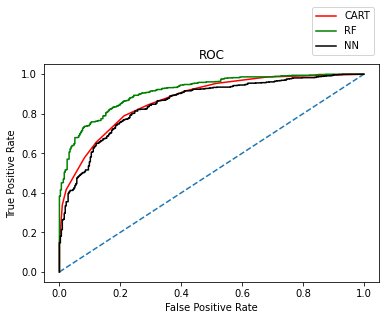

In [483]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_train_fpr, dtcl_train_tpr,color='red',label="CART")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='green',label="RF")
plt.plot(nncl_train_fpr,nncl_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve of LR,LDA,KNN,NB on Train Data

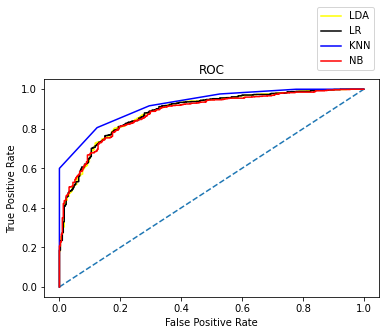

In [482]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr,color='yellow',label="LDA")
plt.plot(lr_train_fpr,lr_train_tpr,color='black',label="LR")
plt.plot(knn_train_fpr,knn_train_tpr,color='blue',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='red',label="NB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve of DT,RF,NN on Test data

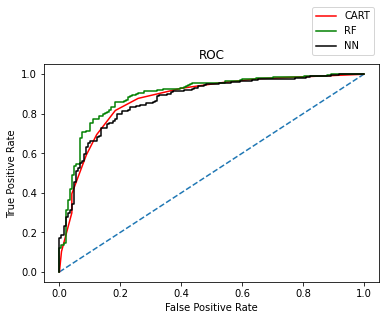

In [484]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dtcl_test_fpr, dtcl_test_tpr,color='red',label="CART")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='green',label="RF")
plt.plot(nncl_test_fpr,nncl_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve on Test data

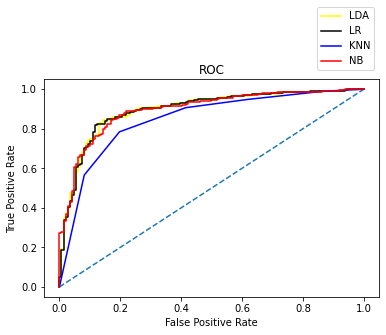

In [485]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr,color='yellow',label="LDA")
plt.plot(lr_test_fpr,lr_test_tpr,color='black',label="LR")
plt.plot(knn_test_fpr,knn_test_tpr,color='blue',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='red',label="NB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Overall on comparing the 3 models, we can conclude that  Random Forest is best/optimized because of the lowest difference among evaluation metrics over train and test set, and slightly high scores (better than ANN, which can be considered as second best). In addition, in this particular study, accuracy is a very important metric because the channel would like to predicting overall win and seats covered by a particular party. Good accuracy for positive class was obtained from the Random Forest model.

### 1.8 Based on these predictions, what are the insights?

Insights and Reccommendations:

1.Elections can be forecasted with reasonable accuracy also in multiparty systems.Therefore model with best accuracy have to be found to predict the  overall win and seats covered by a particular party. 

2.Accuracy is calculated for each model to predict the vote so that the news channel can easily predict the overall win seat covered by the party.

3.The channel predicts the vote then and now with each gender separately as party Europe faces higher votes compared to other parties.

4.All the parties faces a major voting/hipe atleast in a single voting booth.

5.Random Forest is best/optimized because of the lowest difference among evaluation metrics over train and test set, and slightly high scores (better than ANN, which can be considered as second best). In addition, in this particular study, accuracy is a very important metric because the channel would like to predicting overall win and seats covered by a particular party. Good accuracy for positive class was obtained from the Random Forest model.




### Problem 2:
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.President Franklin D. Roosevelt in 1941             
2.President John F. Kennedy in 1961               
3.President Richard Nixon in 1973                         

In [8]:
import nltk
import re
import string
#nltk.download('inaugural')
#nltk.download('punkt')
from nltk.corpus import inaugural
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [9]:
inaugural

<PlaintextCorpusReader in 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data\\corpora\\inaugural'>

In [10]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [11]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [12]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

### 1941-Roosevelt

In [13]:
folder = nltk.data.find('C:\\Users\\hp\\AppData\\Roaming\\nltk_data\\corpora\\inaugural')
corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '1941-Roosevelt.txt')

print ("The number of sentences =", len(corpusReader.sents()))
print ("The number of paragraphs =", len(corpusReader.paras()))
print ("The number of words =", len([word for sentence in corpusReader.sents() for word in sentence]))
print ("The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word]))

The number of sentences = 68
The number of paragraphs = 38
The number of words = 1536
The number of characters = 6174


### 1961-Kennedy

In [14]:
folder = nltk.data.find('C:\\Users\\hp\\AppData\\Roaming\\nltk_data\\corpora\\inaugural')
corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '1961-Kennedy.txt')

print ("The number of sentences =", len(corpusReader.sents()))
print ("The number of paragraphs =", len(corpusReader.paras()))
print ("The number of words =", len([word for sentence in corpusReader.sents() for word in sentence]))
print ("The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word]))

The number of sentences = 52
The number of paragraphs = 27
The number of words = 1546
The number of characters = 6202


### 1973-Nixon

In [15]:
folder = nltk.data.find('C:\\Users\\hp\\AppData\\Roaming\\nltk_data\\corpora\\inaugural')
corpusReader = nltk.corpus.PlaintextCorpusReader(folder, '1973-Nixon.txt')

print ("The number of sentences =", len(corpusReader.sents()))
print ("The number of paragraphs =", len(corpusReader.paras()))
print ("The number of words =", len([word for sentence in corpusReader.sents() for word in sentence]))
print ("The number of characters =", len([char for sentence in corpusReader.sents() for word in sentence for char in word]))

The number of sentences = 69
The number of paragraphs = 51
The number of words = 2028
The number of characters = 8122


### 2.2 Remove all the stopwords from all three speeches.

In [16]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [17]:
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Roosevelt

In [18]:
word_list = inaugural.raw('1941-Roosevelt.txt')
filtered_words_roosevelt = [word_list for word_list in word_list.split() if not word_list in stop]
print(filtered_words_roosevelt)

['On', 'national', 'day', 'inauguration', 'since', '1789,', 'people', 'renewed', 'sense', 'dedication', 'United', 'States.', 'In', "Washington's", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation.', 'In', "Lincoln's", 'day', 'task', 'people', 'preserve', 'Nation', 'disruption', 'within.', 'In', 'day', 'task', 'people', 'save', 'Nation', 'institutions', 'disruption', 'without.', 'To', 'us', 'come', 'time,', 'midst', 'swift', 'happenings,', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', 'been,', 'rediscover', 'may', 'be.', 'If', 'not,', 'risk', 'real', 'peril', 'inaction.', 'Lives', 'nations', 'determined', 'count', 'years,', 'lifetime', 'human', 'spirit.', 'The', 'life', 'man', 'three-score', 'years', 'ten:', 'little', 'more,', 'little', 'less.', 'The', 'life', 'nation', 'fullness', 'measure', 'live.', 'There', 'men', 'doubt', 'this.', 'There', 'men', 'believe', 'democracy,', 'form', 'Government', 'frame', 'life,', 'limited', 'measured', 'kind', 'm

In [19]:
len(filtered_words_roosevelt)
print ("The number of words =", len(filtered_words_roosevelt))

The number of words = 728


In [20]:
" ".join(filtered_words_roosevelt)

'On national day inauguration since 1789, people renewed sense dedication United States. In Washington\'s day task people create weld together nation. In Lincoln\'s day task people preserve Nation disruption within. In day task people save Nation institutions disruption without. To us come time, midst swift happenings, pause moment take stock -- recall place history been, rediscover may be. If not, risk real peril inaction. Lives nations determined count years, lifetime human spirit. The life man three-score years ten: little more, little less. The life nation fullness measure live. There men doubt this. There men believe democracy, form Government frame life, limited measured kind mystical artificial fate that, unexplained reason, tyranny slavery become surging wave future -- freedom ebbing tide. But Americans know true. Eight years ago, life Republic seemed frozen fatalistic terror, proved true. We midst shock -- acted. We acted quickly, boldly, decisively. These later years living y

### Kennedy

In [21]:
word_list = inaugural.raw('1961-Kennedy.txt')
filtered_words_kennedy = [word_list for word_list in word_list.split() if not word_list in stop]
print(filtered_words_kennedy)

['Vice', 'President', 'Johnson,', 'Mr.', 'Speaker,', 'Mr.', 'Chief', 'Justice,', 'President', 'Eisenhower,', 'Vice', 'President', 'Nixon,', 'President', 'Truman,', 'reverend', 'clergy,', 'fellow', 'citizens,', 'observe', 'today', 'victory', 'party,', 'celebration', 'freedom', '--', 'symbolizing', 'end,', 'well', 'beginning', '--', 'signifying', 'renewal,', 'well', 'change.', 'For', 'I', 'sworn', 'I', 'Almighty', 'God', 'solemn', 'oath', 'forebears', 'l', 'prescribed', 'nearly', 'century', 'three', 'quarters', 'ago.', 'The', 'world', 'different', 'now.', 'For', 'man', 'holds', 'mortal', 'hands', 'power', 'abolish', 'forms', 'human', 'poverty', 'forms', 'human', 'life.', 'And', 'yet', 'revolutionary', 'beliefs', 'forebears', 'fought', 'still', 'issue', 'around', 'globe', '--', 'belief', 'rights', 'man', 'come', 'generosity', 'state,', 'hand', 'God.', 'We', 'dare', 'forget', 'today', 'heirs', 'first', 'revolution.', 'Let', 'word', 'go', 'forth', 'time', 'place,', 'friend', 'foe', 'alike,'

In [22]:
len(filtered_words_kennedy)
print ("The number of words =", len(filtered_words_kennedy))

The number of words = 772


In [23]:
" ".join(filtered_words_kennedy)

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, observe today victory party, celebration freedom -- symbolizing end, well beginning -- signifying renewal, well change. For I sworn I Almighty God solemn oath forebears l prescribed nearly century three quarters ago. The world different now. For man holds mortal hands power abolish forms human poverty forms human life. And yet revolutionary beliefs forebears fought still issue around globe -- belief rights man come generosity state, hand God. We dare forget today heirs first revolution. Let word go forth time place, friend foe alike, torch passed new generation Americans -- born century, tempered war, disciplined hard bitter peace, proud ancient heritage -- unwilling witness permit slow undoing human rights Nation always committed, committed today home around world. Let every nation know, whether wishes us well ill, shall pay price, be

### Nixon

In [24]:
word_list = inaugural.raw('1973-Nixon.txt')
filtered_words_nixon = [word_list for word_list in word_list.split() if not word_list in stop]
print(filtered_words_nixon)

['Mr.', 'Vice', 'President,', 'Mr.', 'Speaker,', 'Mr.', 'Chief', 'Justice,', 'Senator', 'Cook,', 'Mrs.', 'Eisenhower,', 'fellow', 'citizens', 'great', 'good', 'country', 'share', 'together:', 'When', 'met', 'four', 'years', 'ago,', 'America', 'bleak', 'spirit,', 'depressed', 'prospect', 'seemingly', 'endless', 'war', 'abroad', 'destructive', 'conflict', 'home.', 'As', 'meet', 'today,', 'stand', 'threshold', 'new', 'era', 'peace', 'world.', 'The', 'central', 'question', 'us', 'is:', 'How', 'shall', 'use', 'peace?', 'Let', 'us', 'resolve', 'era', 'enter', 'postwar', 'periods', 'often', 'been:', 'time', 'retreat', 'isolation', 'leads', 'stagnation', 'home', 'invites', 'new', 'danger', 'abroad.', 'Let', 'us', 'resolve', 'become:', 'time', 'great', 'responsibilities', 'greatly', 'borne,', 'renew', 'spirit', 'promise', 'America', 'enter', 'third', 'century', 'nation.', 'This', 'past', 'year', 'saw', 'far-reaching', 'results', 'new', 'policies', 'peace.', 'By', 'continuing', 'revitalize', 'tr

In [25]:
len(filtered_words_nixon)
print ("The number of words =", len(filtered_words_nixon))

The number of words = 920


In [26]:
" ".join(filtered_words_nixon)

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, fellow citizens great good country share together: When met four years ago, America bleak spirit, depressed prospect seemingly endless war abroad destructive conflict home. As meet today, stand threshold new era peace world. The central question us is: How shall use peace? Let us resolve era enter postwar periods often been: time retreat isolation leads stagnation home invites new danger abroad. Let us resolve become: time great responsibilities greatly borne, renew spirit promise America enter third century nation. This past year saw far-reaching results new policies peace. By continuing revitalize traditional friendships, missions Peking Moscow, able establish base new durable pattern relationships among nations world. Because America\'s bold initiatives, 1972 long remembered year greatest progress since end World War II toward lasting peace world. The peace seek world flimsy peace merely interlude wa

### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [27]:
from nltk import FreqDist, ConditionalFreqDist

### Roosevelt

In [28]:
fd_roosevelt = FreqDist(filtered_words_roosevelt)
fd_roosevelt

FreqDist({'--': 22, 'It': 13, 'We': 10, 'The': 9, 'know': 9, 'us': 8, 'life': 6, 'people': 5, 'In': 5, 'human': 5, ...})

In [29]:
fd_roosevelt.most_common(3)

[('--', 22), ('It', 13), ('We', 10)]

### Kennedy

In [30]:
fd_kennedy = FreqDist(filtered_words_kennedy)
fd_kennedy

FreqDist({'--': 24, 'us': 11, 'Let': 8, 'let': 8, 'new': 7, 'pledge': 7, 'sides': 7, 'I': 5, 'shall': 5, 'To': 5, ...})

In [31]:
fd_kennedy.most_common(3)

[('--', 24), ('us', 11), ('Let', 8)]

### Nixon

In [32]:
fd_nixon = FreqDist(filtered_words_nixon)
fd_nixon

FreqDist({'us': 25, '--': 17, 'new': 15, 'Let': 13, 'I': 12, 'peace': 11, 'great': 9, 'America': 9, 'let': 9, 'We': 9, ...})

In [33]:
fd_nixon.most_common(3)

[('us', 25), ('--', 17), ('new', 15)]

### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [34]:
!pip install wordcloud

In [35]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud,STOPWORDS

### Roosevelt

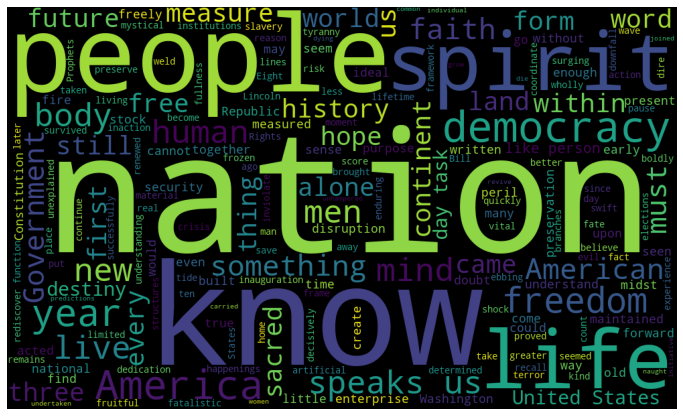

In [36]:
wordcloud = WordCloud(stopwords= stop,
                      background_color='black',
                      width=1000,
                      height=600
                     ).generate(" ".join(filtered_words_roosevelt))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Kennedy

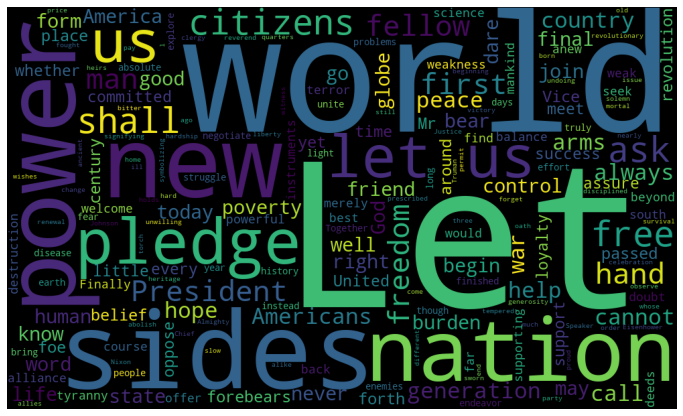

In [37]:
wordcloud = WordCloud(stopwords= stop,
                      background_color='black',
                      width=1000,
                      height=600
                     ).generate(" ".join(filtered_words_kennedy))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### Nixon

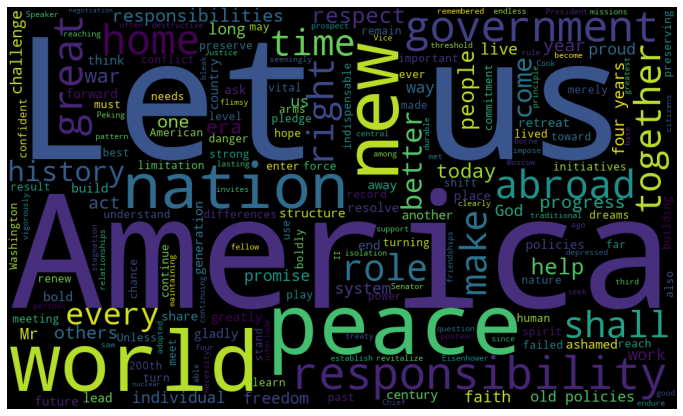

In [38]:
wordcloud = WordCloud(stopwords= stop,
                      background_color='black',
                      width=1000,
                      height=600
                     ).generate(" ".join(filtered_words_nixon))
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# ---------------------------------------------------End-------------------------------------------------------